In [1]:
'''
Developed by Sumbit, Inc for AI Trade Signals project. Please refrain from sharing the data/ideas/code used here with others.
Please be careful especially with academics. They have used our ideas to publish papers and books in the past.
This code and data are given to you for your learning only. It belongs to Sumbit Inc., Feel free to use it to enhance your skills in machine learning.
'''

'\nDeveloped by Sumbit, Inc for AI Trade Signals project. Please refrain from sharing the data/ideas/code used here with others.\nPlease be careful especially with academics. They have used our ideas to publish papers and books in the past.\nThis code and data are given to you for your learning only. It belongs to Sumbit Inc., Feel free to use it to enhance your skills in machine learning.\n'

In [2]:
'''
If you are running locally then 
1. reboot your local machine
2. create an environment called 'colab' using anaconda prompt
if you have a gpu
conda create -n colab python tensorflow-gpu 
if not 
conda create -n colab python tensorflow
3. to install jupyter notebook
conda install jupyter notebook
4. to go to the 'colab' environment
activate colab
5. change file path to locate this notebook and then type 'jupyter notebook'

If you use colab
1. save the data file in your google drive
2. goto colab and start running the code
'''

"\nIf you are running locally then \n1. reboot your local machine\n2. create an environment called 'colab' using anaconda prompt\nif you have a gpu\nconda create -n colab python tensorflow-gpu \nif not \nconda create -n colab python tensorflow\n3. to install jupyter notebook\nconda install jupyter notebook\n4. to go to the 'colab' environment\nactivate colab\n5. change file path to locate this notebook and then type 'jupyter notebook'\n\nIf you use colab\n1. save the data file in your google drive\n2. goto colab and start running the code\n"

In [3]:
#install prominent libraries with specific versions. Change versions to the output of block 4
#!pip install tensorflow==1.15.0
#!pip install keras==2.2.4-tf
#!pip install pandas== 0.25.1
#!pip install sklearn==0.23.1
#!pip install matplotlib==3.2.1
#!pip install hyperas
#!pip install hyperopt
#!pip install yfinance
#!pip install pandas_market_calendars

In [4]:
from __future__ import print_function                                                                                                                                                                                                                                                                                                                              # from tensorflow.contrib.rnn import *import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, CuDNNLSTM, CuDNNGRU, Input, Activation, Flatten, BatchNormalization, Reshape,Concatenate,Bidirectional, TimeDistributed
from keras.callbacks import ModelCheckpoint, TensorBoard, History
from keras.models import Model, load_model
from keras.layers.advanced_activations import LeakyReLU
from keras import regularizers
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
from matplotlib import style
from keras.optimizers import SGD, RMSprop, Adam, Adadelta
from keras.utils import np_utils
from sklearn.preprocessing import*
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam, Adadelta
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint, TensorBoard, History, ReduceLROnPlateau 
import pandas as pd
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from collections import Counter
import operator
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools
import hyperas
import hyperopt
from hyperas.distributions import choice, uniform
from hyperas import optim
from hyperopt import Trials, STATUS_OK, tpe, rand
from keras.layers import Conv1D, MaxPooling1D, ZeroPadding1D
import pandas_market_calendars as mcal 
import datetime 
from datetime import timedelta  
import yfinance as yf
import glob 
import pickle
import gc
from IPython.display import clear_output

C:\Users\kenneth\Anaconda3\envs\gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kenneth\Anaconda3\envs\gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kenneth\Anaconda3\envs\gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kenneth\Anaconda3\envs\gpu\lib\site-packages\tensorflow\python\f

In [5]:
#Get library versions
print("tensorflow.__version__ = ", tf.__version__)
# import tensorflow.python.keras
# print("keras.__version__ = ", tensorflow.python.keras.__version__)
import sklearn 
print("sklearn.__version__ = ", sklearn.__version__)
print("numpy.__version__ = ", np.__version__)
print("pandas.__version__ = ", pd.__version__)
import matplotlib
print("matplotlib.__version__ = ", matplotlib.__version__)
now = datetime.datetime.now()
today = now.strftime("%Y-%m-%d")
print ("Last run date : ", today)

tensorflow.__version__ =  1.10.0
sklearn.__version__ =  0.21.3
numpy.__version__ =  1.17.0
pandas.__version__ =  1.0.1
matplotlib.__version__ =  3.1.3
Last run date :  2020-08-07


In [6]:
'''
*****************************************************
please make sure the model_name is the same as the notebook name
*****************************************************
'''
model_name = '3.4_Bidirectional_CuDNNLSTM' # For hyperas, it is the notebook name (make sure the notebook resides in google drive if using colab)
max_evals = 2 # number of hyperas evaluations for finding hyperparameters. More choices will require to higher evaluations
early_stopping_count= 100 # stop training run if there is no improvement in accuracy after the choosen epoch count
training_epochs=5 # Note: hyperas epochs are different from training epochs
val_accuracy ='val_acc'  # change it to 'val_acc' for tensorflow  below 1.15 versions.
accuracy = 'acc' # change it to 'acc' for tensorflow  below 1.15 versions.
training_verbose = 2 #choice 0, 1, 2 or False
checkpointer_verbose = 2 #choice 0, 1, 2 or False
call_reduce_verbose = 1 #choice 0, 1, 2 or False
random_state = 54

In [7]:
# change data parameters to improve accuracy
def data_params():
    """
    Function passes global data parameters to hyperas optim.minimize method.
    Please make ensure __pycache__ in your folder and and temp_model.py files are deleted 
    manually if you are making changes to these parameters
    """
    
    batch_size= 512  # batch_size for training and evaluation
    time_steps = 28   # Number of time steps to create in the dataset
    rm_window =100     # Number of rolling mean columns for choosen ticker price
    hyperas_epochs = 5  # number of epochs for each trials during hypears evaluation
    forecast_period = 7 # can be 1 to 7 in a 7day model dataset(given)
    
    '''
    ***********************************************************************************
    check to see if using 'RobustScaler','Normalizer', 'MinMaxScaler', 'MaxAbsScaler', 
    'PowerTransformer', 'QuantileTransformer' instead of 'StandardScaler' improves accuracy
    ***********************************************************************************
    '''
    x_scaler=StandardScaler() # change the pre-processing method to improve accuracy
    
    return batch_size, time_steps, rm_window, hyperas_epochs, forecast_period, x_scaler

In [8]:
'''
***************************************************************************************************
Please choose 'True' or 'False' parameter for search, train and starting epoch one 
*****************************************************************************************************
'''

best_model_search = True # 'True' to search for best model, 'False' to use already saved existing best model
perform_training = True # 'True' to  train, 'False' to not to train after best_model search
starting_epoch_one = True # 'True' to train from scratch(epoch 1) , 'False' to load the last checkpoint weights of previous training run
evaluate_all_folds = True # evaluate the trained model for all the folds

In [9]:
def data_split():  
    kfold = True # 'True' to implement kfold, 'False' to use train_test_split
    train_size = 0.85  # use train_test_split between (0.7 to 0.9),make sure test is atleast of one batch_size
    shuffle = False # 'True' to shuffle
    split = 10 # number of splits in kfold
    fold_number = 8 # (the choosen fold_number of the split becomes test data, rest becomes train data)
    random_state= 54 # for random seed
    return kfold, train_size, shuffle, split, fold_number,random_state

In [10]:
if os.path.exists('best_model/'+model_name+'.h5'):
    print('Best model exists but you can still search for a better model')
    best_model_input_shape = load_model('best_model/'+model_name+'.h5').input_shape
        
else:
    print('Best model doesnt exist, changing best_model variable to True')
    best_model_search= True
    

if best_model_search and perform_training:
    print('you have choosen to search for best model and then train')
elif best_model_search and not perform_training:
    print('you have choosen to search for best model only')
elif not best_model_search and perform_training:
    print('you have choosen to train using already saved best model')
    print('For training use best model batch_size:', best_model_input_shape[0])
    print('For training use best model time steps:', best_model_input_shape[1])
    print('For training use best model features:', best_model_input_shape[2])
elif not best_model_search and not perform_training:
     print('you have choosen to not to search or train. Therefore the model will not run')  

if os.path.exists('train_model/checkpoint/'+model_name+'.ckpt'):
    print('check point exists')
    if os.path.exists('train_metrics/'+model_name+'.csv'):
        train_metrics = pd.read_csv('train_metrics/'+model_name+'.csv', index_col=0)
        print('\n','Results of last run checkpoint:')
        print(train_metrics.tail(1))       
else:
    print("check point doesn't exist, starting training from the epoch 1")
    starting_epoch_one = True 

Best model doesnt exist, changing best_model variable to True
you have choosen to search for best model and then train
check point doesn't exist, starting training from the epoch 1


In [11]:
#random seed to generate reproduceable results
from numpy.random import seed
seed(random_state)
try:
    tf.compat.v1.set_random_seed(random_state)
except:
    from tensorflow import set_random_seed
    set_random_seed(random_state)
random.seed(random_state)
os.environ['PYTHONHASHSEED']=str(1)
os.environ['TF_KERAS'] = '1'

In [12]:
# create these folders if they do not exist
def build_path(dirName):
    try:
        os.makedirs(dirName)    
        print("Directory " , dirName ,  " created ")
    except:
        print("Directory " , dirName ,  " already exists")  

In [13]:
# to check if GPU is getting used locally.....you need to see CPU as well as GPU in the output
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5174295845685239884
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7139449242
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10906101749700921116
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [14]:
def feature_selection():
    '''
    Function reads the dataset and prepares inputs and labels
    '''
    ticker = '^GSPC'  # ticker to classify as buy or sell
    #features
    stocks = ['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBY', 'BDX', 'BEN', 'BF-B', 'BIIB', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR', 'BRK-B', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CPRI', 'CPRT', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIA', 'DIS', 'DISCA', 'DISCK', 'DISH', 'DLR', 'DLTR', 'DOV', 'DOW', 'DRE', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DX-Y.NYB', 'DXC', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'EOG', 'EQIX', 'EQR', 'ES', 'ESS', 'ETFC', 'ETN', 'ETR', 'EVRG', 'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'F', 'FANG', 'FAST', 'FB', 'FBHS', 'FCX', 'FDX', 'FE', 'FFIV', 'FIS', 'FISV', 'FITB', 'FLIR', 'FLS', 'FLT', 'FMC', 'FOX', 'FOXA', 'FRC', 'FRT', 'FTI', 'FTNT', 'FTV', 'GD', 'GE', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GOOG', 'GPC', 'GPN', 'GPS', 'GRMN', 'GS', 'GWW', 'HAL', 'HAS', 'HBAN', 'HBI', 'HCA', 'HD', 'HES', 'HFC', 'HIG', 'HII', 'HLT', 'HOG', 'HOLX', 'HON', 'HP', 'HPE', 'HPQ', 'HRB', 'HRL', 'HSIC', 'HST', 'HSY', 'HUM', 'IBM', 'ICE', 'IDXX', 'IEX', 'IFF', 'ILMN', 'INCY', 'INFO', 'INTC', 'INTU', 'IP', 'IPG', 'IPGP', 'IQV', 'IR', 'IRM', 'ISRG', 'IT', 'ITW', 'IVZ', 'J', 'JBHT', 'JCI', 'JKHY', 'JNJ', 'JNPR', 'JPM', 'JWN', 'K', 'KEY', 'KEYS', 'KHC', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO', 'KR', 'KSS', 'KSU', 'L', 'LB', 'LDOS', 'LEG', 'LEN', 'LH', 'LHX', 'LIN', 'LKQ', 'LLY', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUV', 'LVS', 'LW', 'LYB', 'LYV', 'M', 'MA', 'MAA', 'MAR', 'MAS', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MGM', 'MHK', 'MKC', 'MKTX', 'MLM', 'MMC', 'MMM', 'MNST', 'MO', 'MOS', 'MPC', 'MRK', 'MRO', 'MS', 'MSCI', 'MSFT', 'MSI', 'MTB', 'MTD', 'MU', 'MXIM', 'MYL', 'NBL', 'NCLH', 'NDAQ', 'NEE', 'NEM', 'NFLX', 'NI', 'NKE', 'NLOK', 'NLSN', 'NOC', 'NOV', 'NOW', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NVR', 'NWL', 'NWS', 'NWSA', 'O', 'ODFL', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OXY', 'PAYX', 'PBCT', 'PCAR', 'PEAK', 'PEG', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM', 'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'PPG', 'PPL', 'PRGO', 'PRU', 'PSA', 'PSX', 'PVH', 'PWR', 'PXD', 'PYPL', 'QCOM', 'QRVO', 'RCL', 'RE', 'REG', 'REGN', 'RF', 'RHI', 'RJF', 'RL', 'RMD', 'ROK', 'ROL', 'ROP', 'ROST', 'RSG', 'RTN', 'SBAC', 'SBUX', 'SCHW', 'SEE', 'SHW', 'SIVB', 'SJM', 'SLB', 'SLG', 'SNA', 'SNPS', 'SO', 'SPG', 'SPGI', 'SPY', 'SRE', 'STE', 'STT', 'STX', 'STZ', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYY', 'T', 'TAP', 'TDG', 'TEL', 'TFC', 'TFX', 'TGT', 'TIF', 'TJX', 'TMO', 'TMUS', 'TPR', 'TROW', 'TRV', 'TSCO', 'TSN', 'TTWO', 'TWTR', 'TXN', 'TXT', 'UA', 'UAA', 'UAL', 'UDR', 'UHS', 'ULTA', 'UNH', 'UNM', 'UNP', 'UPS', 'URI', 'USB', 'UTX', 'V', 'VAR', 'VFC', 'VIAC', 'VLO', 'VMC', 'VNO', 'VRSK', 'VRSN', 'VRTX', 'VTR', 'VZ', 'WAB', 'WAT', 'WBA', 'WCG', 'WDC', 'WEC', 'WELL', 'WFC', 'WHR', 'WLTW', 'WM', 'WMB', 'WMT', 'WRB', 'WRK', 'WU', 'WY', 'WYNN', 'XEC', 'XEL', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLNX', 'XLP', 'XLU', 'XLV', 'XLY', 'XOM', 'XRAY', 'XRT', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION', 'ZTS', '^GSPC', '^IXIC', '^NDX', '^SOX', '^TNX', '^VIX', '^VVIX', '^VXN', '^VXO', '^VXV']
    short_interest = ['Trading Volume']
    nytimes = ['neg', 'neu', 'pos']
    economic = ['Dividend', 'Earnings', 'CPI', 'Long Interest Rate', 'Real Price', 'Real Dividend', 'Real Earnings', 'Cyclically Adjusted PE Ratio', 'ECRI USLEADING LEVEL', 'ECRI USLEADING GROWTH', 'ECRI USLAGGING LEVEL', 'ECRI USLAGGING GROWTH', 'ECRI_USCOIN LEVEL', 'ECRI_USCOIN GROWTH', 'University of Michigan Consumer Survey, Index of Consumer Sentiment', 'Bullish', 'Neutral', 'Bearish', 'Bullish 8-Week Mov Avg', 'Bull-Bear Spread', 'Bullish Average', 'Bullish Average + St. Dev', 'Bullish Average - St. Dev', 'Stock Market Confidence Indices - United States One Year Index Data - Individual', 'Stock Market Confidence Indices - United States One Year Index Data - Institutional', 'Stock Market Confidence Indices - United States Buy on Dips Confidence Index Data - Individual', 'Stock Market Confidence Indices - United States Buy on Dips Confidence Index Data - Institutional', 'Stock Market Confidence Indices - United States Crash Confidence Index Data - Individual', 'Stock Market Confidence Indices - United States Crash Confidence Index Data - Institutional', 'Stock Market Confidence Indices - United States Valuation Index Data - Individual', 'Stock Market Confidence Indices - United States Valuation Index Data - Institutional', 'Zillow Home Value Index (Metro): Zillow Rental Index - All Homes - United States', 'Zillow Home Value Index (Metro): Turnover - All Homes - United States', 'Zillow Home Value Index (Metro): Price To Rent Ratio - All Homes - United States', 'Zillow Home Value Index (Metro): Median Listing Price - All Homes - United States', 'Zillow Home Value Index (Metro):  Home Sold As Foreclosure - Ratio - All Homes - United States', 'Historical Housing Market Data - Real Home Price Index', 'Cost Index', 'U.S. Population (Millions)', 'Long Rate', 'Historical Housing Market Data - Nominal Home Price Index', 'Historical Housing Market Data - Consumer Price Index (Quarterly)', '30-Year Conventional Mortgage Rate', 'House Price Index - US National', '15-Year Fix Rate', '15-Year Fix Rate Fees & Points', '5-Year Adjustable Rate', '5-Year Adjustable Rate Fees & Points', '1-Year Adjustable Rate', '1-Year Adjustable Rate Fees & Points', '30-Year Fixed Rate Mortgage Average in the United States', 'Federal Funds Rate', '90 day T Bill Rate', 'One Year Maturity Treasury Yield', 'Ten Year Maturity Treasury Yield', 'Freddie Mac Commitment Fixed Rate Mortgages', 'Freddie Mac Commitment ARMs', 'Prime Rate', 'Total Housing Starts', 'Single Family Housing Starts', 'Multi-Family Housing Starts', 'New Single-Family Sales', 'Existing Single-Family Home Sales', '1-Year CD: National Rate of Banks', '5-Year CD: National Rate of Banks', 'Interest Checking Accounts: National Rate of Banks', 'Money Market Accounts: National Rate of Banks', '1-Month AA Financial Commercial Paper Rate', '3-Month AA Financial Commercial Paper Rate', '1-Month AA Nonfinancial Commercial Paper Rate', '3-Month AA Nonfinancial Commercial Paper Rate', 'Effective Federal Funds Rate', '10-Year Treasury Inflation-Indexed Security, Constant Maturity', '20-Year Treasury Inflation-Indexed Security, Constant Maturity', '30-Year Treasury Inflation-Indexed Security, Constant Maturity', '5-Year Treasury Inflation-Indexed Security, Constant Maturity', '7-Year Treasury Inflation-Indexed Security, Constant Maturity', '10-Year Treasury Constant Maturity Rate', '2-Year Treasury Constant Maturity Rate', '20-Year Treasury Constant Maturity Rate', '3-Year Treasury Constant Maturity Rate', '30-Year Treasury Constant Maturity Rate', '5-Year Treasury Constant Maturity Rate', '7-Year Treasury Constant Maturity Rate', 'Bank Prime Loan Rate', '1-Year Treasury Bill: Secondary Market Rate', '3-Month Treasury Bill: Secondary Market Rate', '4-Week Treasury Bill: Secondary Market Rate', '6-Month Treasury Bill: Secondary Market Rate', 'Overnight London Interbank Offered Rate (LIBOR), based on U.S. Dollar', 'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan', 'Commercial Bank Interest Rate on Credit Card Plans, All Accounts', 'RR3_TBILL_PGDP_2', 'RR3_TBILL_PGDP_3', 'RR3_TBILL_PGDP_4', 'RR3_TBILL_PGDP_5', 'RR2_TBILL_CCPI_2', 'RR2_TBILL_CCPI_3', 'RR2_TBILL_CCPI_4', 'RR2_TBILL_CCPI_5', 'Gross domestic product', 'Personal consumption expenditures', ':Goods', '::Durable goods', '::Nondurable goods', ':Services', 'Gross private domestic investment', 'Net exports of goods and services', 'Government consumption expenditures and gross investment', '::Gross domestic income (GDI)', '::Gross national product', '::Gross national income', '::Disposable personal income', 'Personal income', ':Compensation of employees', '::Wages and salaries', ':Population (midperiod; thousands)', '::Disposable personal income; current dollars', 'Services', ':Household consumption expenditures (for services)', '::Housing and utilities', '::Health care', '::Transportation services', '::Recreation services', '::Food services and accommodations', '::Financial services and insurance', '::Other services', 'Corporate profits with inventory valuation and capital consumption adjustments', 'Consumer Price Index - USA', 'United States Gross National Savings, % of GDP', 'United States GDP at Constant Prices, % change', 'Nominal Potential Gross Domestic Product', 'Industrial Production: Durable Goods: Other durable goods', 'FRED: Projection of General government net lending/borrowing for United States', 'FRED: Real Potential Gross Domestic Product', 'FRED: Real Gross Domestic Product', 'FRED: Gross Domestic Product', 'FRBP: GDPplus GDP Growth', 'Inflation YOY - USA', 'Consumer Price Index for All Urban Consumers: All Items', 'PRCCPI1', 'PRCCPI2', 'PRCCPI3', 'PRCCPI4', 'PRCCPI5', 'PRCCPI6', 'PRCCPI7', 'PRCCPI8', 'PRCCPI9', 'PRCCPI10', 'PRCCPI11', 'PRCCPI12', 'PRCCPI13', 'PRCCPI14', 'PRCCPI15', 'PRCCPI16', 'PRCCPI17', 'PRCCPI18', 'PRCCPI19', 'PRCCPI20', 'Mean CPI1', 'Mean CPI2', 'Mean CPI3', 'Mean CPI4', 'Mean CPI5', 'Mean CPI6', 'Mean CPIA', 'Mean CPIB', 'Mean CPIC', 'Median CPI1', 'Median CPI2', 'Median CPI3', 'Median CPI4', 'Median CPI5', 'Median CPI6', 'Median CPIA', 'Median CPIB', 'Median CPIC', 'CORECPI1', 'CORECPI2', 'CORECPI3', 'CORECPI4', 'CORECPI5', 'CORECPI6', 'CORECPIA', 'CORECPIB', 'CORECPIC', 'Median CORECPI1', 'Median CORECPI2', 'Median CORECPI3', 'Median CORECPI4', 'Median CORECPI5', 'Median CORECPI6', 'Median CORECPIA', 'Median CORECPIB', 'Median CORECPIC', 'Employment; Openings; All industries; Rate (Percent) - National', 'Employment; Gross Job Losses; All industries; Rate (Percent) - National', 'Employment - All employees, quarterly averages, seasonally adjusted, thousands; Total nonfarm industry', 'Employment - All employees, thousands; Total private industry', 'Employment - All employees, thousands; Total nonfarm industry', 'Hires for Total nonfarm in Total US Region', 'Layoffs and discharges for Total nonfarm in Total US Region', 'Total separations for Total nonfarm in Total US Region', 'Hires percent for Total private in Total US Region', 'Job openings for Total private in Total US Region', 'Job openings percent for Total private in Total US Region', 'Total separations for Total private in Total US Region', 'Hires for Construction in Total US Region', 'Total separations for Construction in Total US Region', 'Hires for Manufacturing in Total US Region', 'Hires for Government in Total US Region', 'Total separations for Government in Total US Region', 'US Forecast Unemployment Rate, % of Total Labor Force', 'ISM Manufacturing Employment Index', 'ISM Non-Manufacturing Employment Index', 'FRED Forecast Natural Rate of Unemployment (Short-Term)', 'FRED Forecast Natural Rate of Unemployment (Long-Term)', 'ADP_Total private', 'ADP_Goods producing', 'Service providing', 'ADP_Goods Producing Industries_1-19', 'ADP_Goods Producing Industries_20-49', 'ADP_Goods Producing Industries_1-49', 'ADP_Goods Producing Industries_50-499', 'ADP_Goods Producing Industries_500+', 'ADP_Goods Producing Industries_500-999', 'ADP_Goods Producing Industries_1,000+', 'ADP_Construction', 'ADP_Natural resources & mining', 'Manufacturing', 'ADP_Prof.l/business services', 'ADP_Professional services', 'ADP_Total Non-Farm Private_1-19', 'ADP_Total Non-Farm Private_20-49', 'ADP_Total Non-Farm Private_1-49', 'ADP_Total Non-Farm Private_50-499', 'ADP_Total Non-Farm Private_500+', 'ADP_Total Non-Farm Private_500-999', '1000+', 'ADP_Private Service_1-19', 'ADP_Private Service_20-49', 'ADP_Private Service_1-49', 'ADP_Private Service_50-499', 'ADP_Private Service_500+', 'ADP_Private Service_500-999', 'ADP_Private Service_1,000+', 'Hand to Mouth-Manufacturing Buying Policy: Capital Expenditures', 'Average Days-Manufacturing Buying Policy: Capital Expenditures', 'Hand to Mouth-Manufacturing Buying Policy: MRO Supplies', 'Average Days-Manufacturing Buying Policy: MRO Supplies', 'Manufacturing Backlog of Orders Index', "Manufacturing Customers' Inventories Index", 'Manufacturing Supplier Deliveries Index', 'Manufacturing New Export Orders Index', 'Manufacturing Imports Index', 'Manufacturing Inventories Index', 'Manufacturing New Orders Index', 'Manufacturing Prices Index', 'Manufacturing Production Index', 'Non-Manufacturing Backlog of Orders Index', 'Non-Manufacturing Business Activity Index', 'Non-Manufacturing Supplier Deliveries Index', 'Non-Manufacturing New Export Orders Index', 'Non-Manufacturing Imports Index', 'Non-Manufacturing Inventories Index', 'Non-Manufacturing Inventory Sentiment Index', 'Non-Manufacturing New Orders Index', 'NMI Non-Manufacturing Index', 'Non-Manufacturing Prices Index', 'Gold Prices (Daily) - Currency USD', 'Milk, Nonfat dry, Chicago', 'Crude Oil Futures, Continuous Contract #1 (CL1) (Front Month)', 'UK Natural Gas Futures, Continuous Contract', 'Natural Gas (Henry Hub) Physical Futures, Continuous Contract #1 (NG1) (Front Month)', 'STEO price forecast, Monthly', 'US All Grades Conventional Gas Price', 'Copper Prices', 'Aluminum Prices', 'Silver Price: London Fixing', 'Seasonal Factors for the Empire State Manufacturing Survey - Future General Business Conditions - Percent Reporting Increase', 'Empire State Manufacturing Index - Forecasted Inventories - Diffusion Index (Seasonally Adjusted)', 'Seasonal Factors for the Empire State Manufacturing Survey - Current New Orders - Percent Reporting Decrease', 'Seasonal Factors for the Empire State Manufacturing Survey - Current New Orders - Percent Reporting Increase', 'Empire State Manufacturing Index - Forecasted Shipments - Diffusion Index (Seasonally Adjusted)', 'Empire State Manufacturing Index - Forecasted Unfilled Orders - Diffusion Index (Seasonally Adjusted)', 'Philly Fed Seasonally Adjusted Diffusion Indexes - Future New Orders', 'Philly Fed Seasonally Adjusted Diffusion Indexes - Future Shipments', 'Philly Fed Seasonally Adjusted Diffusion Indexes - Future Unfilled Orders', 'Future New Orders;Percent Reporting Increases for FRB - Philadelphia District']
    pattern = ['weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'year_1971', 'year_1972', 'year_1973', 'year_1974', 'year_1975', 'year_1976', 'year_1977', 'year_1978', 'year_1979', 'year_1980', 'year_1981', 'year_1982', 'year_1983', 'year_1984', 'year_1985', 'year_1986', 'year_1987', 'year_1988', 'year_1989', 'year_1990', 'year_1991', 'year_1992', 'year_1993', 'year_1994', 'year_1995', 'year_1996', 'year_1997', 'year_1998', 'year_1999', 'year_2000', 'year_2001', 'year_2002', 'year_2003', 'year_2004', 'year_2005', 'year_2006', 'year_2007', 'year_2008', 'year_2009', 'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017', 'year_2018', 'year_2019', 'year_2020', 'quarter_2', 'quarter_3', 'quarter_4', 'days_of_month_2', 'days_of_month_3', 'days_of_month_4', 'days_of_month_5', 'days_of_month_6', 'days_of_month_7', 'days_of_month_8', 'days_of_month_9', 'days_of_month_10', 'days_of_month_11', 'days_of_month_12', 'days_of_month_13', 'days_of_month_14', 'days_of_month_15', 'days_of_month_16', 'days_of_month_17', 'days_of_month_18', 'days_of_month_19', 'days_of_month_20', 'days_of_month_21', 'days_of_month_22', 'days_of_month_23', 'days_of_month_24', 'days_of_month_25', 'days_of_month_26', 'days_of_month_27', 'days_of_month_28', 'days_of_month_29', 'days_of_month_30', 'days_of_month_31', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'early_close']
    derivatives = ['CALLS', 'PUTS', 'TOTAL_PC', 'P/C Ratio']
    fama = ['ff_0.45', 'ff_-0.32', 'ff_-0.08', 'ff_0.009000000000000001', 'ff_-0.67', 'ff_0.0', 'ff_-0.32.1', 'ff_-0.01', 'ff_0.15', 'ff_0.012']
    correlations = ['corr^GSPC_A', 'corr^GSPC_AAL', 'corr^GSPC_AAP', 'corr^GSPC_AAPL', 'corr^GSPC_ABBV', 'corr^GSPC_ABC', 'corr^GSPC_ABMD', 'corr^GSPC_ABT', 'corr^GSPC_ACN', 'corr^GSPC_ADBE', 'corr^GSPC_ADI', 'corr^GSPC_ADM', 'corr^GSPC_ADP', 'corr^GSPC_ADS', 'corr^GSPC_ADSK', 'corr^GSPC_AEE', 'corr^GSPC_AEP', 'corr^GSPC_AES', 'corr^GSPC_AFL', 'corr^GSPC_AGN', 'corr^GSPC_AIG', 'corr^GSPC_AIV', 'corr^GSPC_AIZ', 'corr^GSPC_AJG', 'corr^GSPC_AKAM', 'corr^GSPC_ALB', 'corr^GSPC_ALGN', 'corr^GSPC_ALK', 'corr^GSPC_ALL', 'corr^GSPC_ALLE', 'corr^GSPC_ALXN', 'corr^GSPC_AMAT', 'corr^GSPC_AMCR', 'corr^GSPC_AMD', 'corr^GSPC_AME', 'corr^GSPC_AMG', 'corr^GSPC_AMGN', 'corr^GSPC_AMP', 'corr^GSPC_AMT', 'corr^GSPC_AMZN', 'corr^GSPC_ANET', 'corr^GSPC_ANSS', 'corr^GSPC_ANTM', 'corr^GSPC_AON', 'corr^GSPC_AOS', 'corr^GSPC_APA', 'corr^GSPC_APD', 'corr^GSPC_APH', 'corr^GSPC_APTV', 'corr^GSPC_ARE', 'corr^GSPC_ARNC', 'corr^GSPC_ATO', 'corr^GSPC_ATVI', 'corr^GSPC_AVB', 'corr^GSPC_AVGO', 'corr^GSPC_AVY', 'corr^GSPC_AWK', 'corr^GSPC_AXP', 'corr^GSPC_AZO', 'corr^GSPC_BA', 'corr^GSPC_BAC', 'corr^GSPC_BAX', 'corr^GSPC_BBY', 'corr^GSPC_BDX', 'corr^GSPC_BEN', 'corr^GSPC_BF-B', 'corr^GSPC_BIIB', 'corr^GSPC_BK', 'corr^GSPC_BKNG', 'corr^GSPC_BKR', 'corr^GSPC_BLK', 'corr^GSPC_BLL', 'corr^GSPC_BMY', 'corr^GSPC_BR', 'corr^GSPC_BRK-B', 'corr^GSPC_BSX', 'corr^GSPC_BWA', 'corr^GSPC_BXP', 'corr^GSPC_C', 'corr^GSPC_CAG', 'corr^GSPC_CAH', 'corr^GSPC_CAT', 'corr^GSPC_CB', 'corr^GSPC_CBOE', 'corr^GSPC_CBRE', 'corr^GSPC_CCI', 'corr^GSPC_CCL', 'corr^GSPC_CDNS', 'corr^GSPC_CDW', 'corr^GSPC_CE', 'corr^GSPC_CERN', 'corr^GSPC_CF', 'corr^GSPC_CFG', 'corr^GSPC_CHD', 'corr^GSPC_CHRW', 'corr^GSPC_CHTR', 'corr^GSPC_CI', 'corr^GSPC_CINF', 'corr^GSPC_CL', 'corr^GSPC_CLX', 'corr^GSPC_CMA', 'corr^GSPC_CMCSA', 'corr^GSPC_CME', 'corr^GSPC_CMG', 'corr^GSPC_CMI', 'corr^GSPC_CMS', 'corr^GSPC_CNC', 'corr^GSPC_CNP', 'corr^GSPC_COF', 'corr^GSPC_COG', 'corr^GSPC_COO', 'corr^GSPC_COP', 'corr^GSPC_COST', 'corr^GSPC_COTY', 'corr^GSPC_CPB', 'corr^GSPC_CPRI', 'corr^GSPC_CPRT', 'corr^GSPC_CRM', 'corr^GSPC_CSCO', 'corr^GSPC_CSX', 'corr^GSPC_CTAS', 'corr^GSPC_CTL', 'corr^GSPC_CTSH', 'corr^GSPC_CTVA', 'corr^GSPC_CTXS', 'corr^GSPC_CVS', 'corr^GSPC_CVX', 'corr^GSPC_CXO', 'corr^GSPC_D', 'corr^GSPC_DAL', 'corr^GSPC_DD', 'corr^GSPC_DE', 'corr^GSPC_DFS', 'corr^GSPC_DG', 'corr^GSPC_DGX', 'corr^GSPC_DHI', 'corr^GSPC_DHR', 'corr^GSPC_DIA', 'corr^GSPC_DIS', 'corr^GSPC_DISCA', 'corr^GSPC_DISCK', 'corr^GSPC_DISH', 'corr^GSPC_DLR', 'corr^GSPC_DLTR', 'corr^GSPC_DOV', 'corr^GSPC_DOW', 'corr^GSPC_DRE', 'corr^GSPC_DRI', 'corr^GSPC_DTE', 'corr^GSPC_DUK', 'corr^GSPC_DVA', 'corr^GSPC_DVN', 'corr^GSPC_DX-Y.NYB', 'corr^GSPC_DXC', 'corr^GSPC_EA', 'corr^GSPC_EBAY', 'corr^GSPC_ECL', 'corr^GSPC_ED', 'corr^GSPC_EFX', 'corr^GSPC_EIX', 'corr^GSPC_EL', 'corr^GSPC_EMN', 'corr^GSPC_EMR', 'corr^GSPC_EOG', 'corr^GSPC_EQIX', 'corr^GSPC_EQR', 'corr^GSPC_ES', 'corr^GSPC_ESS', 'corr^GSPC_ETFC', 'corr^GSPC_ETN', 'corr^GSPC_ETR', 'corr^GSPC_EVRG', 'corr^GSPC_EW', 'corr^GSPC_EXC', 'corr^GSPC_EXPD', 'corr^GSPC_EXPE', 'corr^GSPC_EXR', 'corr^GSPC_F', 'corr^GSPC_FANG', 'corr^GSPC_FAST', 'corr^GSPC_FB', 'corr^GSPC_FBHS', 'corr^GSPC_FCX', 'corr^GSPC_FDX', 'corr^GSPC_FE', 'corr^GSPC_FFIV', 'corr^GSPC_FIS', 'corr^GSPC_FISV', 'corr^GSPC_FITB', 'corr^GSPC_FLIR', 'corr^GSPC_FLS', 'corr^GSPC_FLT', 'corr^GSPC_FMC', 'corr^GSPC_FOX', 'corr^GSPC_FOXA', 'corr^GSPC_FRC', 'corr^GSPC_FRT', 'corr^GSPC_FTI', 'corr^GSPC_FTNT', 'corr^GSPC_FTV', 'corr^GSPC_GD', 'corr^GSPC_GE', 'corr^GSPC_GILD', 'corr^GSPC_GIS', 'corr^GSPC_GL', 'corr^GSPC_GLW', 'corr^GSPC_GM', 'corr^GSPC_GOOG', 'corr^GSPC_GPC', 'corr^GSPC_GPN', 'corr^GSPC_GPS', 'corr^GSPC_GRMN', 'corr^GSPC_GS', 'corr^GSPC_GWW', 'corr^GSPC_HAL', 'corr^GSPC_HAS', 'corr^GSPC_HBAN', 'corr^GSPC_HBI', 'corr^GSPC_HCA', 'corr^GSPC_HD', 'corr^GSPC_HES', 'corr^GSPC_HFC', 'corr^GSPC_HIG', 'corr^GSPC_HII', 'corr^GSPC_HLT', 'corr^GSPC_HOG', 'corr^GSPC_HOLX', 'corr^GSPC_HON', 'corr^GSPC_HP', 'corr^GSPC_HPE', 'corr^GSPC_HPQ', 'corr^GSPC_HRB', 'corr^GSPC_HRL', 'corr^GSPC_HSIC', 'corr^GSPC_HST', 'corr^GSPC_HSY', 'corr^GSPC_HUM', 'corr^GSPC_IBM', 'corr^GSPC_ICE', 'corr^GSPC_IDXX', 'corr^GSPC_IEX', 'corr^GSPC_IFF', 'corr^GSPC_ILMN', 'corr^GSPC_INCY', 'corr^GSPC_INFO', 'corr^GSPC_INTC', 'corr^GSPC_INTU', 'corr^GSPC_IP', 'corr^GSPC_IPG', 'corr^GSPC_IPGP', 'corr^GSPC_IQV', 'corr^GSPC_IR', 'corr^GSPC_IRM', 'corr^GSPC_ISRG', 'corr^GSPC_IT', 'corr^GSPC_ITW', 'corr^GSPC_IVZ', 'corr^GSPC_JBHT', 'corr^GSPC_JCI', 'corr^GSPC_JEC', 'corr^GSPC_JKHY', 'corr^GSPC_JNJ', 'corr^GSPC_JNPR', 'corr^GSPC_JPM', 'corr^GSPC_JWN', 'corr^GSPC_K', 'corr^GSPC_KEY', 'corr^GSPC_KEYS', 'corr^GSPC_KHC', 'corr^GSPC_KIM', 'corr^GSPC_KLAC', 'corr^GSPC_KMB', 'corr^GSPC_KMI', 'corr^GSPC_KMX', 'corr^GSPC_KO', 'corr^GSPC_KR', 'corr^GSPC_KSS', 'corr^GSPC_KSU', 'corr^GSPC_L', 'corr^GSPC_LB', 'corr^GSPC_LDOS', 'corr^GSPC_LEG', 'corr^GSPC_LEN', 'corr^GSPC_LH', 'corr^GSPC_LHX', 'corr^GSPC_LIN', 'corr^GSPC_LKQ', 'corr^GSPC_LLY', 'corr^GSPC_LMT', 'corr^GSPC_LNC', 'corr^GSPC_LNT', 'corr^GSPC_LOW', 'corr^GSPC_LRCX', 'corr^GSPC_LUV', 'corr^GSPC_LVS', 'corr^GSPC_LW', 'corr^GSPC_LYB', 'corr^GSPC_M', 'corr^GSPC_MA', 'corr^GSPC_MAA', 'corr^GSPC_MAC', 'corr^GSPC_MAR', 'corr^GSPC_MAS', 'corr^GSPC_MCD', 'corr^GSPC_MCHP', 'corr^GSPC_MCK', 'corr^GSPC_MCO', 'corr^GSPC_MDLZ', 'corr^GSPC_MDT', 'corr^GSPC_MET', 'corr^GSPC_MGM', 'corr^GSPC_MHK', 'corr^GSPC_MKC', 'corr^GSPC_MKTX', 'corr^GSPC_MLM', 'corr^GSPC_MMC', 'corr^GSPC_MMM', 'corr^GSPC_MNST', 'corr^GSPC_MO', 'corr^GSPC_MOS', 'corr^GSPC_MPC', 'corr^GSPC_MRK', 'corr^GSPC_MRO', 'corr^GSPC_MS', 'corr^GSPC_MSCI', 'corr^GSPC_MSFT', 'corr^GSPC_MSI', 'corr^GSPC_MTB', 'corr^GSPC_MTD', 'corr^GSPC_MU', 'corr^GSPC_MXIM', 'corr^GSPC_MYL', 'corr^GSPC_NBL', 'corr^GSPC_NCLH', 'corr^GSPC_NDAQ', 'corr^GSPC_NEE', 'corr^GSPC_NEM', 'corr^GSPC_NFLX', 'corr^GSPC_NI', 'corr^GSPC_NKE', 'corr^GSPC_NLOK', 'corr^GSPC_NLSN', 'corr^GSPC_NOC', 'corr^GSPC_NOV', 'corr^GSPC_NOW', 'corr^GSPC_NRG', 'corr^GSPC_NSC', 'corr^GSPC_NTAP', 'corr^GSPC_NTRS', 'corr^GSPC_NUE', 'corr^GSPC_NVDA', 'corr^GSPC_NVR', 'corr^GSPC_NWL', 'corr^GSPC_NWS', 'corr^GSPC_NWSA', 'corr^GSPC_O', 'corr^GSPC_ODFL', 'corr^GSPC_OKE', 'corr^GSPC_OMC', 'corr^GSPC_ORCL', 'corr^GSPC_ORLY', 'corr^GSPC_OXY', 'corr^GSPC_PAYX', 'corr^GSPC_PBCT', 'corr^GSPC_PCAR', 'corr^GSPC_PEAK', 'corr^GSPC_PEG', 'corr^GSPC_PEP', 'corr^GSPC_PFE', 'corr^GSPC_PFG', 'corr^GSPC_PG', 'corr^GSPC_PGR', 'corr^GSPC_PH', 'corr^GSPC_PHM', 'corr^GSPC_PKG', 'corr^GSPC_PKI', 'corr^GSPC_PLD', 'corr^GSPC_PM', 'corr^GSPC_PNC', 'corr^GSPC_PNR', 'corr^GSPC_PNW', 'corr^GSPC_PPG', 'corr^GSPC_PPL', 'corr^GSPC_PRGO', 'corr^GSPC_PRU', 'corr^GSPC_PSA', 'corr^GSPC_PSX', 'corr^GSPC_PVH', 'corr^GSPC_PWR', 'corr^GSPC_PXD', 'corr^GSPC_PYPL', 'corr^GSPC_QCOM', 'corr^GSPC_QRVO', 'corr^GSPC_RCL', 'corr^GSPC_RE', 'corr^GSPC_REG', 'corr^GSPC_REGN', 'corr^GSPC_RF', 'corr^GSPC_RHI', 'corr^GSPC_RJF', 'corr^GSPC_RL', 'corr^GSPC_RMD', 'corr^GSPC_ROK', 'corr^GSPC_ROL', 'corr^GSPC_ROP', 'corr^GSPC_ROST', 'corr^GSPC_RSG', 'corr^GSPC_RTN', 'corr^GSPC_SBAC', 'corr^GSPC_SBUX', 'corr^GSPC_SCHW', 'corr^GSPC_SEE', 'corr^GSPC_SHW', 'corr^GSPC_SIVB', 'corr^GSPC_SJM', 'corr^GSPC_SLB', 'corr^GSPC_SLG', 'corr^GSPC_SNA', 'corr^GSPC_SNPS', 'corr^GSPC_SO', 'corr^GSPC_SPG', 'corr^GSPC_SPGI', 'corr^GSPC_SPY', 'corr^GSPC_SRE', 'corr^GSPC_STT', 'corr^GSPC_STX', 'corr^GSPC_STZ', 'corr^GSPC_SWK', 'corr^GSPC_SWKS', 'corr^GSPC_SYF', 'corr^GSPC_SYK', 'corr^GSPC_SYY', 'corr^GSPC_T', 'corr^GSPC_TAP', 'corr^GSPC_TDG', 'corr^GSPC_TEL', 'corr^GSPC_TFC', 'corr^GSPC_TFX', 'corr^GSPC_TGT', 'corr^GSPC_TIF', 'corr^GSPC_TJX', 'corr^GSPC_TMO', 'corr^GSPC_TMUS', 'corr^GSPC_TPR', 'corr^GSPC_TRIP', 'corr^GSPC_TROW', 'corr^GSPC_TRV', 'corr^GSPC_TSCO', 'corr^GSPC_TSN', 'corr^GSPC_TTWO', 'corr^GSPC_TWTR', 'corr^GSPC_TXN', 'corr^GSPC_TXT', 'corr^GSPC_UA', 'corr^GSPC_UAA', 'corr^GSPC_UAL', 'corr^GSPC_UDR', 'corr^GSPC_UHS', 'corr^GSPC_ULTA', 'corr^GSPC_UNH', 'corr^GSPC_UNM', 'corr^GSPC_UNP', 'corr^GSPC_UPS', 'corr^GSPC_URI', 'corr^GSPC_USB', 'corr^GSPC_UTX', 'corr^GSPC_V', 'corr^GSPC_VAR', 'corr^GSPC_VFC', 'corr^GSPC_VIAC', 'corr^GSPC_VLO', 'corr^GSPC_VMC', 'corr^GSPC_VNO', 'corr^GSPC_VRSK', 'corr^GSPC_VRSN', 'corr^GSPC_VRTX', 'corr^GSPC_VTR', 'corr^GSPC_VZ', 'corr^GSPC_WAB', 'corr^GSPC_WAT', 'corr^GSPC_WBA', 'corr^GSPC_WCG', 'corr^GSPC_WDC', 'corr^GSPC_WEC', 'corr^GSPC_WELL', 'corr^GSPC_WFC', 'corr^GSPC_WHR', 'corr^GSPC_WLTW', 'corr^GSPC_WM', 'corr^GSPC_WMB', 'corr^GSPC_WMT', 'corr^GSPC_WRB', 'corr^GSPC_WRK', 'corr^GSPC_WU', 'corr^GSPC_WY', 'corr^GSPC_WYNN', 'corr^GSPC_XEC', 'corr^GSPC_XEL', 'corr^GSPC_XLB', 'corr^GSPC_XLE', 'corr^GSPC_XLF', 'corr^GSPC_XLI', 'corr^GSPC_XLK', 'corr^GSPC_XLNX', 'corr^GSPC_XLP', 'corr^GSPC_XLU', 'corr^GSPC_XLV', 'corr^GSPC_XLY', 'corr^GSPC_XOM', 'corr^GSPC_XRAY', 'corr^GSPC_XRT', 'corr^GSPC_XRX', 'corr^GSPC_XYL', 'corr^GSPC_YUM', 'corr^GSPC_ZBH', 'corr^GSPC_ZION', 'corr^GSPC_ZTS', 'corr^GSPC_^IXIC', 'corr^GSPC_^NDX', 'corr^GSPC_^SOX', 'corr^GSPC_^TNX', 'corr^GSPC_^VIX', 'corr^GSPC_^VVIX', 'corr^GSPC_^VXN', 'corr^GSPC_^VXO', 'corr^GSPC_^VXV']
    technicals = ['50Minus200_dayMA', '15_dayMA', 'Bol_upper_band', 'Bol_lower_band', 'percent_b', 'Advance_Decline_ratio', '1AD', '2ADD', '3ADOSC', '4ADX', '5ADXR', '6APO', '7AROON DOWN', '7AROON UP', '8AROONOSC', '9ASIN_ADJCLOSE', '10ASIN_HIGH', '11ASIN_LOW', '12ATR', '13AVGPRICE', '14UPPER BAND', '14MIDDLE BAND', '14LOWER BAND', '15rm_return', '15upperband_return', '15lowerband_return', '16BETA', '17BETAMARKET', '18BOP', '19CCI', '20CDL2CROWS', '21CDL3BLACKCROWS', '22CDL3INSIDE', '23CDL3LINESTRIKE', '24CDL3OUTSIDE', '25CDL3STARSINSOUTH', '26CDL3WHITESOLDIERS', '27CDLABANDONEDBABY', '28CDLADVANCEBLOCK', '29CDLBELTHOLD', '30CDLBREAKAWAY0', '31CDLCLOSINGMARUBOZU', '32CDLCONCEALBABYSWALL', '33CDLCOUNTERATTACK', '34CDLDARKCLOUDCOVER', '35CDLDOJI', '36CDLDOJISTAR', '37CDLDRAGONFLYDOJI', '38CDLENGULFING', '39CDLEVENINGDOJISTAR', '40CDLEVENINGSTAR', '41CDLGAPSIDESIDEWHITE', '42CDLGRAVESTONEDOJI', '43CDLHAMMER', '44CDLHANGINGMAN', '45CDLHARAMI', '46CDLHARAMICROSS', '47CDLHIGHWAVE', '48CDLHIKKAKE', '49CDLHIKKAKEMOD', '50CDLHOMINGPIGEON', '51CDLIDENTICAL3CROWS0', '52CDLINNECK', '53CDLINVERTEDHAMMER', '54CDLKICKING', '55CDLKICKINGBYLENGTH', '56CDLLADDERBOTTOM', '57CDLLONGLEGGEDDOJI', '58CDLLONGLINE', '59CDLMARUBOZU', '60CDLMATCHINGLOW', '61CDLMATHOLD', '62CDLMORNINGDOJISTAR', '63CDLMORNINGSTAR', '64CDLONNECK', '65CDLPIERCING', '66CDLRICKSHAWMAN', '67CDLRISEFALL3METHODS', '68CDLSEPARATINGLINES', '69CDLSHOOTINGSTAR', '70CDLSHORTLINE', '71CDLSPINNINGTOP', '72CDLSTALLEDPATTERN', '73CDLSTICKSANDWICH', '74CDLTAKURI', '75CDLTASUKIGAP', '76CDLTHRUSTING', '77CDLTRISTAR', '78CDLUNIQUE3RIVER', '79CDLUPSIDEGAP2CROWS', '80CDLXSIDEGAP3METHODS', '81CMO', '82CORREL', '83CORRELMARKET', '84COSH_ADJCLOSE', '85COSH_HIGH', '86COSH_LOW', '87COS_ADJCLOSE', '88COS_HIGH', '89COS_LOW', '90DEMA', '91DIV', '92DX', '93EMA', '94daily_returns', '94excess_returns', '95EXP', '96HIGHLOW', '97HT_DCPERIOD', '98HT_DCPHASE', '99INPHASE', '99QUADRATURE', '100SINE', '100LEADSINE', '101HT_TRENDLINE', '102HT_TRENDMODE', '103KAMA', '104LINEARREG_AD', '105LINEARREG_ADJCLOSE', '106LINEARREG_ADOSC', '107LINEARREG_ADX', '108LINEARREG_ADXR', '109LINEARREG_ANGLE_AD', '110LINEARREG_ANGLE_ADJCLOSE', '111LINEARREG_ANGLE_ADOSC', '112LINEARREG_ANGLE_ADX', '113LINEARREG_ANGLE_ADXR', '114LINEARREG_ANGLE_APO', '115LINEARREG_ANGLE_AROONOSC', '116LINEARREG_ANGLE_AROON_DOWN', '117LINEARREG_ANGLE_AROON_UP', '118LINEARREG_ANGLE_ATR', '119LINEARREG_ANGLE_BOP', '120LINEARREG_ANGLE_CCI', '121LINEARREG_ANGLE_CMO', '122LINEARREG_ANGLE_DEMA', '123LINEARREG_ANGLE_DX', '124LINEARREG_ANGLE_FAMA', '125LINEARREG_ANGLE_FASTD', '126LINEARREG_ANGLE_FASTDR', '127LINEARREG_ANGLE_FASTK', '128LINEARREG_ANGLE_FASTKR', '129LINEARREG_ANGLE_HIGH', '130LINEARREG_ANGLE_HT_DCPERIOD', '131LINEARREG_ANGLE_HT_DCPHASE', '132LINEARREG_ANGLE_HT_TRENDLINE', '133LINEARREG_ANGLE_INPHASE', '134LINEARREG_ANGLE_KAMA', '135LINEARREG_ANGLE_LEADSINE', '136LINEARREG_ANGLE_LOW', '137LINEARREG_ANGLE_LOWER_BAND', '138LINEARREG_ANGLE_MAMA', '139LINEARREG_ANGLE_MFI', '140LINEARREG_ANGLE_MIDDLE_BAND', '141LINEARREG_ANGLE_MINUS_DI', '142LINEARREG_ANGLE_MINUS_DM', '143LINEARREG_ANGLE_MOM', '144LINEARREG_ANGLE_NATR', '145LINEARREG_ANGLE_OBV', '146LINEARREG_ANGLE_PLUS_DI', '147LINEARREG_ANGLE_PLUS_DM', '148LINEARREG_ANGLE_PPO', '149LINEARREG_ANGLE_QUADRATURE', '150LINEARREG_ANGLE_ROC', '151LINEARREG_ANGLE_ROCP', '152LINEARREG_ANGLE_ROCR', '153LINEARREG_ANGLE_ROCR100', '154LINEARREG_ANGLE_RSI', '155LINEARREG_ANGLE_SAR', '156LINEARREG_ANGLE_SAREXT', '157LINEARREG_ANGLE_SINE', '158LINEARREG_ANGLE_SLOWD', '159LINEARREG_ANGLE_SLOWK', '160LINEARREG_ANGLE_T3', '161LINEARREG_ANGLE_TEMA', '162LINEARREG_ANGLE_TRANGE', '163LINEARREG_ANGLE_TRIMA', '164LINEARREG_ANGLE_TRIX', '165LINEARREG_ANGLE_ULTOSC', '166LINEARREG_ANGLE_UPPER_BAND', '167LINEARREG_ANGLE_WILLR', '168LINEARREG_ANGLE_WMA', '169LINEARREG_APO', '170LINEARREG_AROONOSC', '171LINEARREG_AROON_DOWN', '172LINEARREG_AROON_UP', '173LINEARREG_ATR', '174LINEARREG_BOP', '175LINEARREG_CCI', '176LINEARREG_CMO', '177LINEARREG_DEMA', '178LINEARREG_DX', '179LINEARREG_FAMA', '180LINEARREG_FASTD', '181LINEARREG_FASTDR', '182LINEARREG_FASTK', '183LINEARREG_FASTKR', '184LINEARREG_HIGH', '185LINEARREG_HT_DCPERIOD', '186LINEARREG_HT_DCPHASE', '187LINEARREG_HT_TRENDLINE', '188LINEARREG_INPHASE', '189LINEARREG_INTERCEPT_AD', '190LINEARREG_INTERCEPT_ADJCLOSE', '191LINEARREG_INTERCEPT_ADOSC', '192LINEARREG_INTERCEPT_ADX', '193LINEARREG_INTERCEPT_ADXR', '194LINEARREG_INTERCEPT_APO', '195LINEARREG_INTERCEPT_AROONOSC', '196LINEARREG_INTERCEPT_AROON_DOWN', '197LINEARREG_INTERCEPT_AROON_UP', '198LINEARREG_INTERCEPT_ATR', '199LINEARREG_INTERCEPT_BOP', '200LINEARREG_INTERCEPT_CCI', '201LINEARREG_INTERCEPT_CMO', '202LINEARREG_INTERCEPT_DEMA', '203LINEARREG_INTERCEPT_DX', '204LINEARREG_INTERCEPT_FAMA', '205LINEARREG_INTERCEPT_FASTD', '206LINEARREG_INTERCEPT_FASTDR', '207LINEARREG_INTERCEPT_FASTK', '208LINEARREG_INTERCEPT_FASTKR', '209LINEARREG_INTERCEPT_HIGH', '210LINEARREG_INTERCEPT_HT_DCPERIOD', '211LINEARREG_INTERCEPT_HT_DCPHASE', '212LINEARREG_INTERCEPT_HT_TRENDLINE', '213LINEARREG_INTERCEPT_INPHASE', '214LINEARREG_INTERCEPT_KAMA', '215LINEARREG_INTERCEPT_LEADSINE', '216LINEARREG_INTERCEPT_LOW', '217LINEARREG_INTERCEPT_LOWER_BAND', '218LINEARREG_INTERCEPT_MAMA', '219LINEARREG_INTERCEPT_MFI', '220LINEARREG_INTERCEPT_MIDDLE_BAND', '221LINEARREG_INTERCEPT_MINUS_DI', '222LINEARREG_INTERCEPT_MINUS_DM', '223LINEARREG_INTERCEPT_MOM', '224LINEARREG_INTERCEPT_NATR', '225LINEARREG_INTERCEPT_OBV', '226LINEARREG_INTERCEPT_PLUS_DI', '227LINEARREG_INTERCEPT_PLUS_DM', '228LINEARREG_INTERCEPT_PPO', '229LINEARREG_INTERCEPT_QUADRATURE', '230LINEARREG_INTERCEPT_ROC', '231LINEARREG_INTERCEPT_ROCP', '232LINEARREG_INTERCEPT_ROCR', '233LINEARREG_INTERCEPT_ROCR100', '234LINEARREG_INTERCEPT_RSI', '235LINEARREG_INTERCEPT_SAR', '236LINEARREG_INTERCEPT_SAREXT', '237LINEARREG_INTERCEPT_SINE', '238LINEARREG_INTERCEPT_SLOWD', '239LINEARREG_INTERCEPT_SLOWK', '240LINEARREG_INTERCEPT_T3', '241LINEARREG_INTERCEPT_TEMA', '242LINEARREG_INTERCEPT_TRANGE', '243LINEARREG_INTERCEPT_TRIMA', '244LINEARREG_INTERCEPT_TRIX', '245LINEARREG_INTERCEPT_ULTOSC', '246LINEARREG_INTERCEPT_UPPER_BAND', '247LINEARREG_INTERCEPT_WILLR', '248LINEARREG_INTERCEPT_WMA', '249LINEARREG_KAMA', '250LINEARREG_LEADSINE', '251LINEARREG_LOW', '252LINEARREG_LOWER_BAND', '253LINEARREG_MAMA', '254LINEARREG_MFI', '255LINEARREG_MIDDLE_BAND', '256LINEARREG_MINUS_DI', '257LINEARREG_MINUS_DM', '258LINEARREG_MOM', '259LINEARREG_NATR', '260LINEARREG_OBV', '261LINEARREG_PLUS_DI', '262LINEARREG_PLUS_DM', '263LINEARREG_PPO', '264LINEARREG_QUADRATURE', '265LINEARREG_ROC', '266LINEARREG_ROCP', '267LINEARREG_ROCR', '268LINEARREG_ROCR100', '269LINEARREG_RSI', '270LINEARREG_SAR', '271LINEARREG_SAREXT', '272LINEARREG_SINE', '273LINEARREG_SLOPE_AD', '274LINEARREG_SLOPE_ADJCLOSE', '275LINEARREG_SLOPE_ADOSC', '276LINEARREG_SLOPE_ADX', '277LINEARREG_SLOPE_ADXR', '278LINEARREG_SLOPE_APO', '279LINEARREG_SLOPE_AROONOSC', '280LINEARREG_SLOPE_AROON_DOWN', '281LINEARREG_SLOPE_AROON_UP', '282LINEARREG_SLOPE_ATR', '283LINEARREG_SLOPE_BOP', '284LINEARREG_SLOPE_CCI', '285LINEARREG_SLOPE_CMO', '286LINEARREG_SLOPE_DEMA', '287LINEARREG_SLOPE_DX', '288LINEARREG_SLOPE_FAMA', '289LINEARREG_SLOPE_FASTD', '290LINEARREG_SLOPE_FASTDR', '291LINEARREG_SLOPE_FASTK', '292LINEARREG_SLOPE_FASTKR', '293LINEARREG_SLOPE_HIGH', '294LINEARREG_SLOPE_HT_DCPERIOD', '295LINEARREG_SLOPE_HT_DCPHASE', '296LINEARREG_SLOPE_HT_TRENDLINE', '297LINEARREG_SLOPE_INPHASE', '298LINEARREG_SLOPE_KAMA', '299LINEARREG_SLOPE_LEADSINE', '300LINEARREG_SLOPE_LOW', '301LINEARREG_SLOPE_LOWER_BAND', '302LINEARREG_SLOPE_MAMA', '303LINEARREG_SLOPE_MFI', '304LINEARREG_SLOPE_MIDDLE_BAND', '305LINEARREG_SLOPE_MINUS_DI', '306LINEARREG_SLOPE_MINUS_DM', '307LINEARREG_SLOPE_MOM', '308LINEARREG_SLOPE_NATR', '309LINEARREG_SLOPE_OBV', '310LINEARREG_SLOPE_PLUS_DI', '311LINEARREG_SLOPE_PLUS_DM', '312LINEARREG_SLOPE_PPO', '313LINEARREG_SLOPE_QUADRATURE', '314LINEARREG_SLOPE_ROC', '315LINEARREG_SLOPE_ROCP', '316LINEARREG_SLOPE_ROCR', '317LINEARREG_SLOPE_ROCR100', '318LINEARREG_SLOPE_RSI', '319LINEARREG_SLOPE_SAR', '320LINEARREG_SLOPE_SAREXT', '321LINEARREG_SLOPE_SINE', '322LINEARREG_SLOPE_SLOWD', '323LINEARREG_SLOPE_SLOWK', '324LINEARREG_SLOPE_T3', '325LINEARREG_SLOPE_TEMA', '326LINEARREG_SLOPE_TRANGE', '327LINEARREG_SLOPE_TRIMA', '328LINEARREG_SLOPE_TRIX', '329LINEARREG_SLOPE_ULTOSC', '330LINEARREG_SLOPE_UPPER_BAND', '331LINEARREG_SLOPE_WILLR', '332LINEARREG_SLOPE_WMA', '333LINEARREG_SLOWD', '334LINEARREG_SLOWK', '335LINEARREG_T3', '336LINEARREG_TEMA', '337LINEARREG_TRANGE', '338LINEARREG_TRIMA', '339LINEARREG_TRIX', '340LINEARREG_ULTOSC', '341LINEARREG_UPPER_BAND', '342LINEARREG_WILLR', '343LINEARREG_WMA', '344LN_ADJCLOSE', '345LN_HIGH', '346LN_LOW', '347LOG10_ADJCLOSE', '348LOG10_HIGH', '349LOG10_LOW', '350MACD', '350MACD SIGNAL', '350MACD HIST', '351MACD', '351MACD SIGNAL', '351MACD HIST', '352MACD', '352MACD SIGNAL', '352MACD HIST', '353MAMA', '353FAMA', '354MEDPRICE', '355MFI', '356MIDPOINT', '357MIDPRICE', '358MIN', '358MAX', '359MINIDX', '359MAXIDX', '360MINUS_DI', '361MINUS_DM', '362MOM', '363MULT', '364NATR', '365OBV', '366PLUS_DI', '367PLUS_DM', '368PPO', '369^GSPC_rm_2', '369^GSPC_rm_3', '369^GSPC_rm_4', '369^GSPC_rm_5', '369^GSPC_rm_6', '369^GSPC_rm_7', '369^GSPC_rm_8', '369^GSPC_rm_9', '369^GSPC_rm_10', '369^GSPC_rm_11', '369^GSPC_rm_12', '369^GSPC_rm_13', '369^GSPC_rm_14', '369^GSPC_rm_15', '369^GSPC_rm_16', '369^GSPC_rm_17', '369^GSPC_rm_18', '369^GSPC_rm_19', '369^GSPC_rm_20', '369^GSPC_rm_21', '369^GSPC_rm_22', '369^GSPC_rm_23', '369^GSPC_rm_24', '369^GSPC_rm_25', '369^GSPC_rm_26', '369^GSPC_rm_27', '369^GSPC_rm_28', '369^GSPC_rm_29', '369^GSPC_rm_30', '370ROC', '371ROCP', '372ROCR', '373ROCR100', '374RSI', '375SAR', '376SAREXT', '377SINH_ADJCLOSE', '378SINH_HIGH', '379SINH_LOW', '380SIN_ADJCLOSE', '381SIN_HIGH', '382SIN_LOW', '383SMA_25', '383SMA_50', '383SMA_200', '384SQRT_ADJCLOSE', '385SQRT_HIGH', '386SQRT_LOW', '387STDDEV1_AD', '388STDDEV1_ADJCLOSE', '389STDDEV1_ADOSC', '390STDDEV1_ADX', '391STDDEV1_ADXR', '392STDDEV1_APO', '393STDDEV1_AROONOSC', '394STDDEV1_AROON_DOWN', '395STDDEV1_AROON_UP', '396STDDEV1_ATR', '397STDDEV1_BOP', '398STDDEV1_CCI', '399STDDEV1_CMO', '400STDDEV1_DEMA', '401STDDEV1_DX', '402STDDEV1_FAMA', '403STDDEV1_FASTD', '404STDDEV1_FASTDR', '405STDDEV1_FASTK', '406STDDEV1_FASTKR', '407STDDEV1_HIGH', '408STDDEV1_HT_DCPERIOD', '409STDDEV1_HT_DCPHASE', '410STDDEV1_HT_TRENDLINE', '411STDDEV1_INPHASE', '412STDDEV1_KAMA', '413STDDEV1_LEADSINE', '414STDDEV1_LOW', '415STDDEV1_LOWER_BAND', '416STDDEV1_MAMA', '417STDDEV1_MFI', '418STDDEV1_MIDDLE_BAND', '419STDDEV1_MINUS_DI', '420STDDEV1_MINUS_DM', '421STDDEV1_MOM', '422STDDEV1_NATR', '423STDDEV1_OBV', '424STDDEV1_PLUS_DI', '425STDDEV1_PLUS_DM', '426STDDEV1_PPO', '427STDDEV1_QUADRATURE', '428STDDEV1_ROC', '429STDDEV1_ROCP', '430STDDEV1_ROCR', '431STDDEV1_ROCR100', '432STDDEV1_RSI', '433STDDEV1_SAR', '434STDDEV1_SAREXT', '435STDDEV1_SINE', '436STDDEV1_SLOWD', '437STDDEV1_SLOWK', '438STDDEV1_T3', '439STDDEV1_TEMA', '440STDDEV1_TRANGE', '441STDDEV1_TRIMA', '442STDDEV1_TRIX', '443STDDEV1_ULTOSC', '444STDDEV1_UPPER_BAND', '445STDDEV1_WILLR', '446STDDEV1_WMA', '447STDDEV2_AD', '448STDDEV2_ADJCLOSE', '449STDDEV2_ADOSC', '450STDDEV2_ADX', '451STDDEV2_ADXR', '452STDDEV2_APO', '453STDDEV2_AROONOSC', '454STDDEV2_AROON_DOWN', '455STDDEV2_AROON_UP', '456STDDEV2_ATR', '457STDDEV2_BOP', '458STDDEV2_CCI', '459STDDEV2_CMO', '460STDDEV2_DEMA', '461STDDEV2_DX', '462STDDEV2_FAMA', '463STDDEV2_FASTD', '464STDDEV2_FASTDR', '465STDDEV2_FASTK', '466STDDEV2_FASTKR', '467STDDEV2_HIGH', '468STDDEV2_HT_DCPERIOD', '469STDDEV2_HT_DCPHASE', '470STDDEV2_HT_TRENDLINE', '471STDDEV2_INPHASE', '472STDDEV2_KAMA', '473STDDEV2_LEADSINE', '474STDDEV2_LOW', '475STDDEV2_LOWER_BAND', '476STDDEV2_MAMA', '477STDDEV2_MFI', '478STDDEV2_MIDDLE_BAND', '479STDDEV2_MINUS_DI', '480STDDEV2_MINUS_DM', '481STDDEV2_MOM', '482STDDEV2_NATR', '483STDDEV2_OBV', '484STDDEV2_PLUS_DI', '485STDDEV2_PLUS_DM', '486STDDEV2_PPO', '487STDDEV2_QUADRATURE', '488STDDEV2_ROC', '489STDDEV2_ROCP', '490STDDEV2_ROCR', '491STDDEV2_ROCR100', '492STDDEV2_RSI', '493STDDEV2_SAR', '494STDDEV2_SAREXT', '495STDDEV2_SINE', '496STDDEV2_SLOWD', '497STDDEV2_SLOWK', '498STDDEV2_T3', '499STDDEV2_TEMA', '500STDDEV2_TRANGE', '501STDDEV2_TRIMA', '502STDDEV2_TRIX', '503STDDEV2_ULTOSC', '504STDDEV2_UPPER_BAND', '505STDDEV2_WILLR', '506STDDEV2_WMA', '507SLOWK', '507SLOWD', '508FASTK', '508FASTD', '509FASTKR', '509FASTDR', '510SUB', '511SUM', '512T3', '513TANH_ADJCLOSE', '514TANH_HIGH', '515TANH_LOW', '516TAN_ADJCLOSE', '517TAN_HIGH', '518TAN_LOW', '519TEMA', '520TRANGE', '521TRIMA', '522TRIX', '523TSF_AD', '524TSF_ADJCLOSE', '525TSF_ADOSC', '526TSF_ADX', '527TSF_ADXR', '528TSF_APO', '529TSF_AROONOSC', '530TSF_AROON_DOWN', '531TSF_AROON_UP', '532TSF_ATR', '533TSF_BOP', '534TSF_CCI', '535TSF_CMO', '536TSF_DEMA', '537TSF_DX', '538TSF_FAMA', '539TSF_FASTD', '540TSF_FASTDR', '541TSF_FASTK', '542TSF_FASTKR', '543TSF_HIGH', '544TSF_HT_DCPERIOD', '545TSF_HT_DCPHASE', '546TSF_HT_TRENDLINE', '547TSF_INPHASE', '548TSF_KAMA', '549TSF_LEADSINE', '550TSF_LOW', '551TSF_LOWER_BAND', '552TSF_MAMA', '553TSF_MFI', '554TSF_MIDDLE_BAND', '555TSF_MINUS_DI', '556TSF_MINUS_DM', '557TSF_MOM', '558TSF_NATR', '559TSF_OBV', '560TSF_PLUS_DI', '561TSF_PLUS_DM', '562TSF_PPO', '563TSF_QUADRATURE', '564TSF_ROC', '565TSF_ROCP', '566TSF_ROCR', '567TSF_ROCR100', '568TSF_RSI', '569TSF_SAR', '570TSF_SAREXT', '571TSF_SINE', '572TSF_SLOWD', '573TSF_SLOWK', '574TSF_T3', '575TSF_TEMA', '576TSF_TRANGE', '577TSF_TRIMA', '578TSF_TRIX', '579TSF_ULTOSC', '580TSF_UPPER_BAND', '581TSF_WILLR', '582TSF_WMA', '583TYPPRICE', '584ULTOSC', '585VAR1_AD', '586VAR1_ADJCLOSE', '587VAR1_ADOSC', '588VAR1_ADX', '589VAR1_ADXR', '590VAR1_APO', '591VAR1_AROONOSC', '592VAR1_AROON_DOWN', '593VAR1_AROON_UP', '594VAR1_ATR', '595VAR1_BOP', '596VAR1_CCI', '597VAR1_CMO', '598VAR1_DEMA', '599VAR1_DX', '600VAR1_FAMA', '601VAR1_FASTD', '602VAR1_FASTDR', '603VAR1_FASTK', '604VAR1_FASTKR', '605VAR1_HIGH', '606VAR1_HT_DCPERIOD', '607VAR1_HT_DCPHASE', '608VAR1_HT_TRENDLINE', '609VAR1_INPHASE', '610VAR1_KAMA', '611VAR1_LEADSINE', '612VAR1_LOW', '613VAR1_LOWER_BAND', '614VAR1_MAMA', '615VAR1_MFI', '616VAR1_MIDDLE_BAND', '617VAR1_MINUS_DI', '618VAR1_MINUS_DM', '619VAR1_MOM', '620VAR1_NATR', '621VAR1_OBV', '622VAR1_PLUS_DI', '623VAR1_PLUS_DM', '624VAR1_PPO', '625VAR1_QUADRATURE', '626VAR1_ROC', '627VAR1_ROCP', '628VAR1_ROCR', '629VAR1_ROCR100', '630VAR1_RSI', '631VAR1_SAR', '632VAR1_SAREXT', '633VAR1_SINE', '634VAR1_SLOWD', '635VAR1_SLOWK', '636VAR1_T3', '637VAR1_TEMA', '638VAR1_TRANGE', '639VAR1_TRIMA', '640VAR1_TRIX', '641VAR1_ULTOSC', '642VAR1_UPPER_BAND', '643VAR1_WILLR', '644VAR1_WMA', '645VAR2_AD', '646VAR2_ADJCLOSE', '647VAR2_ADOSC', '648VAR2_ADX', '649VAR2_ADXR', '650VAR2_APO', '651VAR2_AROONOSC', '652VAR2_AROON_DOWN', '653VAR2_AROON_UP', '654VAR2_ATR', '655VAR2_BOP', '656VAR2_CCI', '657VAR2_CMO', '658VAR2_DEMA', '659VAR2_DX', '660VAR2_FAMA', '661VAR2_FASTD', '662VAR2_FASTDR', '663VAR2_FASTK', '664VAR2_FASTKR', '665VAR2_HIGH', '666VAR2_HT_DCPERIOD', '667VAR2_HT_DCPHASE', '668VAR2_HT_TRENDLINE', '669VAR2_INPHASE', '670VAR2_KAMA', '671VAR2_LEADSINE', '672VAR2_LOW', '673VAR2_LOWER_BAND', '674VAR2_MAMA', '675VAR2_MFI', '676VAR2_MIDDLE_BAND', '677VAR2_MINUS_DI', '678VAR2_MINUS_DM', '679VAR2_MOM', '680VAR2_NATR', '681VAR2_OBV', '682VAR2_PLUS_DI', '683VAR2_PLUS_DM', '684VAR2_PPO', '685VAR2_QUADRATURE', '686VAR2_ROC', '687VAR2_ROCP', '688VAR2_ROCR', '689VAR2_ROCR100', '690VAR2_RSI', '691VAR2_SAR', '692VAR2_SAREXT', '693VAR2_SINE', '694VAR2_SLOWD', '695VAR2_SLOWK', '696VAR2_T3', '697VAR2_TEMA', '698VAR2_TRANGE', '699VAR2_TRIMA', '700VAR2_TRIX', '701VAR2_ULTOSC', '702VAR2_UPPER_BAND', '703VAR2_WILLR', '704VAR2_WMA', '705WCLPRICE', '706WILLR', '707WMA']
    dtw = ['dtw_^GSPC_A', 'dtw_^GSPC_AAL', 'dtw_^GSPC_AAP', 'dtw_AAPL_^GSPC', 'dtw_ABBV_^GSPC', 'dtw_ABC_^GSPC', 'dtw_ABMD_^GSPC', 'dtw_ABT_^GSPC', 'dtw_ACN_^GSPC', 'dtw_ADBE_^GSPC', 'dtw_ADI_^GSPC', 'dtw_ADM_^GSPC', 'dtw_ADP_^GSPC', 'dtw_ADS_^GSPC', 'dtw_ADSK_^GSPC', 'dtw_AEE_^GSPC', 'dtw_AEP_^GSPC', 'dtw_AES_^GSPC', 'dtw_AFL_^GSPC', 'dtw_AGN_^GSPC', 'dtw_AIG_^GSPC', 'dtw_AIV_^GSPC', 'dtw_AIZ_^GSPC', 'dtw_AJG_^GSPC', 'dtw_AKAM_^GSPC', 'dtw_ALB_^GSPC', 'dtw_ALGN_^GSPC', 'dtw_ALK_^GSPC', 'dtw_ALL_^GSPC', 'dtw_ALLE_^GSPC', 'dtw_ALXN_^GSPC', 'dtw_AMAT_^GSPC', 'dtw_AMCR_^GSPC', 'dtw_AMD_^GSPC', 'dtw_AME_^GSPC', 'dtw_AMGN_^GSPC', 'dtw_AMP_^GSPC', 'dtw_AMT_^GSPC', 'dtw_AMZN_^GSPC', 'dtw_ANET_^GSPC', 'dtw_ANSS_^GSPC', 'dtw_ANTM_^GSPC', 'dtw_AON_^GSPC', 'dtw_AOS_^GSPC', 'dtw_APA_^GSPC', 'dtw_APD_^GSPC', 'dtw_APH_^GSPC', 'dtw_APTV_^GSPC', 'dtw_ARE_^GSPC', 'dtw_ARNC_^GSPC', 'dtw_ATO_^GSPC', 'dtw_ATVI_^GSPC', 'dtw_AVB_^GSPC', 'dtw_AVGO_^GSPC', 'dtw_AVY_^GSPC', 'dtw_AWK_^GSPC', 'dtw_AXP_^GSPC', 'dtw_AZO_^GSPC', 'dtw_BA_^GSPC', 'dtw_BAC_^GSPC', 'dtw_BAX_^GSPC', 'dtw_BBY_^GSPC', 'dtw_BDX_^GSPC', 'dtw_BEN_^GSPC', 'dtw_BF-B_^GSPC', 'dtw_BIIB_^GSPC', 'dtw_BK_^GSPC', 'dtw_BKNG_^GSPC', 'dtw_BKR_^GSPC', 'dtw_BLK_^GSPC', 'dtw_BLL_^GSPC', 'dtw_BMY_^GSPC', 'dtw_BR_^GSPC', 'dtw_BRK-B_^GSPC', 'dtw_BSX_^GSPC', 'dtw_BWA_^GSPC', 'dtw_BXP_^GSPC', 'dtw_C_^GSPC', 'dtw_CAG_^GSPC', 'dtw_CAH_^GSPC', 'dtw_CAT_^GSPC', 'dtw_CB_^GSPC', 'dtw_CBOE_^GSPC', 'dtw_CBRE_^GSPC', 'dtw_CCI_^GSPC', 'dtw_CCL_^GSPC', 'dtw_CDNS_^GSPC', 'dtw_CDW_^GSPC', 'dtw_CE_^GSPC', 'dtw_CERN_^GSPC', 'dtw_CF_^GSPC', 'dtw_CFG_^GSPC', 'dtw_CHD_^GSPC', 'dtw_CHRW_^GSPC', 'dtw_CHTR_^GSPC', 'dtw_CI_^GSPC', 'dtw_CINF_^GSPC', 'dtw_CL_^GSPC', 'dtw_CLX_^GSPC', 'dtw_CMA_^GSPC', 'dtw_CMCSA_^GSPC', 'dtw_CME_^GSPC', 'dtw_CMG_^GSPC', 'dtw_CMI_^GSPC', 'dtw_CMS_^GSPC', 'dtw_CNC_^GSPC', 'dtw_CNP_^GSPC', 'dtw_COF_^GSPC', 'dtw_COG_^GSPC', 'dtw_COO_^GSPC', 'dtw_COP_^GSPC', 'dtw_COST_^GSPC', 'dtw_COTY_^GSPC', 'dtw_CPB_^GSPC', 'dtw_CPRI_^GSPC', 'dtw_CPRT_^GSPC', 'dtw_CRM_^GSPC', 'dtw_CSCO_^GSPC', 'dtw_CSX_^GSPC', 'dtw_CTAS_^GSPC', 'dtw_CTL_^GSPC', 'dtw_CTSH_^GSPC', 'dtw_CTVA_^GSPC', 'dtw_CTXS_^GSPC', 'dtw_CVS_^GSPC', 'dtw_CVX_^GSPC', 'dtw_CXO_^GSPC', 'dtw_D_^GSPC', 'dtw_DAL_^GSPC', 'dtw_DD_^GSPC', 'dtw_DE_^GSPC', 'dtw_DFS_^GSPC', 'dtw_DG_^GSPC', 'dtw_DGX_^GSPC', 'dtw_DHI_^GSPC', 'dtw_DHR_^GSPC', 'dtw_DIA_^GSPC', 'dtw_DIS_^GSPC', 'dtw_DISCA_^GSPC', 'dtw_DISCK_^GSPC', 'dtw_DISH_^GSPC', 'dtw_DLR_^GSPC', 'dtw_DLTR_^GSPC', 'dtw_DOV_^GSPC', 'dtw_DOW_^GSPC', 'dtw_DRE_^GSPC', 'dtw_DRI_^GSPC', 'dtw_DTE_^GSPC', 'dtw_DUK_^GSPC', 'dtw_DVA_^GSPC', 'dtw_DVN_^GSPC', 'dtw_DX-Y.NYB_^GSPC', 'dtw_DXC_^GSPC', 'dtw_EA_^GSPC', 'dtw_EBAY_^GSPC', 'dtw_ECL_^GSPC', 'dtw_ED_^GSPC', 'dtw_EFX_^GSPC', 'dtw_EIX_^GSPC', 'dtw_EL_^GSPC', 'dtw_EMN_^GSPC', 'dtw_EMR_^GSPC', 'dtw_EOG_^GSPC', 'dtw_EQIX_^GSPC', 'dtw_EQR_^GSPC', 'dtw_ES_^GSPC', 'dtw_ESS_^GSPC', 'dtw_ETFC_^GSPC', 'dtw_ETN_^GSPC', 'dtw_ETR_^GSPC', 'dtw_EVRG_^GSPC', 'dtw_EW_^GSPC', 'dtw_EXC_^GSPC', 'dtw_EXPD_^GSPC', 'dtw_EXPE_^GSPC', 'dtw_EXR_^GSPC', 'dtw_F_^GSPC', 'dtw_FANG_^GSPC', 'dtw_FAST_^GSPC', 'dtw_FB_^GSPC', 'dtw_FBHS_^GSPC', 'dtw_FCX_^GSPC', 'dtw_FDX_^GSPC', 'dtw_FE_^GSPC', 'dtw_FFIV_^GSPC', 'dtw_FIS_^GSPC', 'dtw_FISV_^GSPC', 'dtw_FITB_^GSPC', 'dtw_FLIR_^GSPC', 'dtw_FLS_^GSPC', 'dtw_FLT_^GSPC', 'dtw_FMC_^GSPC', 'dtw_FOX_^GSPC', 'dtw_FOXA_^GSPC', 'dtw_FRC_^GSPC', 'dtw_FRT_^GSPC', 'dtw_FTI_^GSPC', 'dtw_FTNT_^GSPC', 'dtw_FTV_^GSPC', 'dtw_GD_^GSPC', 'dtw_GE_^GSPC', 'dtw_GILD_^GSPC', 'dtw_GIS_^GSPC', 'dtw_GL_^GSPC', 'dtw_GLW_^GSPC', 'dtw_GM_^GSPC', 'dtw_GOOG_^GSPC', 'dtw_GPC_^GSPC', 'dtw_GPN_^GSPC', 'dtw_GPS_^GSPC', 'dtw_GRMN_^GSPC', 'dtw_GS_^GSPC', 'dtw_GWW_^GSPC', 'dtw_HAL_^GSPC', 'dtw_HAS_^GSPC', 'dtw_HBAN_^GSPC', 'dtw_HBI_^GSPC', 'dtw_HCA_^GSPC', 'dtw_HD_^GSPC', 'dtw_HES_^GSPC', 'dtw_HFC_^GSPC', 'dtw_HIG_^GSPC', 'dtw_HII_^GSPC', 'dtw_HLT_^GSPC', 'dtw_HOG_^GSPC', 'dtw_HOLX_^GSPC', 'dtw_HON_^GSPC', 'dtw_HP_^GSPC', 'dtw_HPE_^GSPC', 'dtw_HPQ_^GSPC', 'dtw_HRB_^GSPC', 'dtw_HRL_^GSPC', 'dtw_HSIC_^GSPC', 'dtw_HST_^GSPC', 'dtw_HSY_^GSPC', 'dtw_HUM_^GSPC', 'dtw_IBM_^GSPC', 'dtw_ICE_^GSPC', 'dtw_IDXX_^GSPC', 'dtw_IEX_^GSPC', 'dtw_IFF_^GSPC', 'dtw_ILMN_^GSPC', 'dtw_INCY_^GSPC', 'dtw_INFO_^GSPC', 'dtw_INTC_^GSPC', 'dtw_INTU_^GSPC', 'dtw_IP_^GSPC', 'dtw_IPG_^GSPC', 'dtw_IPGP_^GSPC', 'dtw_IQV_^GSPC', 'dtw_IR_^GSPC', 'dtw_IRM_^GSPC', 'dtw_ISRG_^GSPC', 'dtw_IT_^GSPC', 'dtw_ITW_^GSPC', 'dtw_IVZ_^GSPC', 'dtw_J_^GSPC', 'dtw_JBHT_^GSPC', 'dtw_JCI_^GSPC', 'dtw_JKHY_^GSPC', 'dtw_JNJ_^GSPC', 'dtw_JNPR_^GSPC', 'dtw_JPM_^GSPC', 'dtw_JWN_^GSPC', 'dtw_K_^GSPC', 'dtw_KEY_^GSPC', 'dtw_KEYS_^GSPC', 'dtw_KHC_^GSPC', 'dtw_KIM_^GSPC', 'dtw_KLAC_^GSPC', 'dtw_KMB_^GSPC', 'dtw_KMI_^GSPC', 'dtw_KMX_^GSPC', 'dtw_KO_^GSPC', 'dtw_KR_^GSPC', 'dtw_KSS_^GSPC', 'dtw_KSU_^GSPC', 'dtw_L_^GSPC', 'dtw_LB_^GSPC', 'dtw_LDOS_^GSPC', 'dtw_LEG_^GSPC', 'dtw_LEN_^GSPC', 'dtw_LH_^GSPC', 'dtw_LHX_^GSPC', 'dtw_LIN_^GSPC', 'dtw_LKQ_^GSPC', 'dtw_LLY_^GSPC', 'dtw_LMT_^GSPC', 'dtw_LNC_^GSPC', 'dtw_LNT_^GSPC', 'dtw_LOW_^GSPC', 'dtw_LRCX_^GSPC', 'dtw_LUV_^GSPC', 'dtw_LVS_^GSPC', 'dtw_LW_^GSPC', 'dtw_LYB_^GSPC', 'dtw_LYV_^GSPC', 'dtw_M_^GSPC', 'dtw_MA_^GSPC', 'dtw_MAA_^GSPC', 'dtw_MAR_^GSPC', 'dtw_MAS_^GSPC', 'dtw_MCD_^GSPC', 'dtw_MCHP_^GSPC', 'dtw_MCK_^GSPC', 'dtw_MCO_^GSPC', 'dtw_MDLZ_^GSPC', 'dtw_MDT_^GSPC', 'dtw_MET_^GSPC', 'dtw_MGM_^GSPC', 'dtw_MHK_^GSPC', 'dtw_MKC_^GSPC', 'dtw_MKTX_^GSPC', 'dtw_MLM_^GSPC', 'dtw_MMC_^GSPC', 'dtw_MMM_^GSPC', 'dtw_MNST_^GSPC', 'dtw_MO_^GSPC', 'dtw_MOS_^GSPC', 'dtw_MPC_^GSPC', 'dtw_MRK_^GSPC', 'dtw_MRO_^GSPC', 'dtw_MS_^GSPC', 'dtw_MSCI_^GSPC', 'dtw_MSFT_^GSPC', 'dtw_MSI_^GSPC', 'dtw_MTB_^GSPC', 'dtw_MTD_^GSPC', 'dtw_MU_^GSPC', 'dtw_MXIM_^GSPC', 'dtw_MYL_^GSPC', 'dtw_NBL_^GSPC', 'dtw_NCLH_^GSPC', 'dtw_NDAQ_^GSPC', 'dtw_NEE_^GSPC', 'dtw_NEM_^GSPC', 'dtw_NFLX_^GSPC', 'dtw_NI_^GSPC', 'dtw_NKE_^GSPC', 'dtw_NLOK_^GSPC', 'dtw_NLSN_^GSPC', 'dtw_NOC_^GSPC', 'dtw_NOV_^GSPC', 'dtw_NOW_^GSPC', 'dtw_NRG_^GSPC', 'dtw_NSC_^GSPC', 'dtw_NTAP_^GSPC', 'dtw_NTRS_^GSPC', 'dtw_NUE_^GSPC', 'dtw_NVDA_^GSPC', 'dtw_NVR_^GSPC', 'dtw_NWL_^GSPC', 'dtw_NWS_^GSPC', 'dtw_NWSA_^GSPC', 'dtw_O_^GSPC', 'dtw_ODFL_^GSPC', 'dtw_OKE_^GSPC', 'dtw_OMC_^GSPC', 'dtw_ORCL_^GSPC', 'dtw_ORLY_^GSPC', 'dtw_OXY_^GSPC', 'dtw_PAYX_^GSPC', 'dtw_PBCT_^GSPC', 'dtw_PCAR_^GSPC', 'dtw_PEAK_^GSPC', 'dtw_PEG_^GSPC', 'dtw_PEP_^GSPC', 'dtw_PFE_^GSPC', 'dtw_PFG_^GSPC', 'dtw_PG_^GSPC', 'dtw_PGR_^GSPC', 'dtw_PH_^GSPC', 'dtw_PHM_^GSPC', 'dtw_PKG_^GSPC', 'dtw_PKI_^GSPC', 'dtw_PLD_^GSPC', 'dtw_PM_^GSPC', 'dtw_PNC_^GSPC', 'dtw_PNR_^GSPC', 'dtw_PNW_^GSPC', 'dtw_PPG_^GSPC', 'dtw_PPL_^GSPC', 'dtw_PRGO_^GSPC', 'dtw_PRU_^GSPC', 'dtw_PSA_^GSPC', 'dtw_PSX_^GSPC', 'dtw_PVH_^GSPC', 'dtw_PWR_^GSPC', 'dtw_PXD_^GSPC', 'dtw_PYPL_^GSPC', 'dtw_QCOM_^GSPC', 'dtw_QRVO_^GSPC', 'dtw_RCL_^GSPC', 'dtw_RE_^GSPC', 'dtw_REG_^GSPC', 'dtw_REGN_^GSPC', 'dtw_RF_^GSPC', 'dtw_RHI_^GSPC', 'dtw_RJF_^GSPC', 'dtw_RL_^GSPC', 'dtw_RMD_^GSPC', 'dtw_ROK_^GSPC', 'dtw_ROL_^GSPC', 'dtw_ROP_^GSPC', 'dtw_ROST_^GSPC', 'dtw_RSG_^GSPC', 'dtw_RTN_^GSPC', 'dtw_SBAC_^GSPC', 'dtw_SBUX_^GSPC', 'dtw_SCHW_^GSPC', 'dtw_SEE_^GSPC', 'dtw_SHW_^GSPC', 'dtw_SIVB_^GSPC', 'dtw_SJM_^GSPC', 'dtw_SLB_^GSPC', 'dtw_SLG_^GSPC', 'dtw_SNA_^GSPC', 'dtw_SNPS_^GSPC', 'dtw_SO_^GSPC', 'dtw_SPG_^GSPC', 'dtw_SPGI_^GSPC', 'dtw_SPY_^GSPC', 'dtw_SRE_^GSPC', 'dtw_STE_^GSPC', 'dtw_STT_^GSPC', 'dtw_STX_^GSPC', 'dtw_STZ_^GSPC', 'dtw_SWK_^GSPC', 'dtw_SWKS_^GSPC', 'dtw_SYF_^GSPC', 'dtw_SYK_^GSPC', 'dtw_SYY_^GSPC', 'dtw_T_^GSPC', 'dtw_TAP_^GSPC', 'dtw_TDG_^GSPC', 'dtw_TEL_^GSPC', 'dtw_TFC_^GSPC', 'dtw_TFX_^GSPC', 'dtw_TGT_^GSPC', 'dtw_TIF_^GSPC', 'dtw_TJX_^GSPC', 'dtw_TMO_^GSPC', 'dtw_TMUS_^GSPC', 'dtw_TPR_^GSPC', 'dtw_TROW_^GSPC', 'dtw_TRV_^GSPC', 'dtw_TSCO_^GSPC', 'dtw_TSN_^GSPC', 'dtw_TTWO_^GSPC', 'dtw_TWTR_^GSPC', 'dtw_TXN_^GSPC', 'dtw_TXT_^GSPC', 'dtw_UA_^GSPC', 'dtw_UAA_^GSPC', 'dtw_UAL_^GSPC', 'dtw_UDR_^GSPC', 'dtw_UHS_^GSPC', 'dtw_ULTA_^GSPC', 'dtw_UNH_^GSPC', 'dtw_UNM_^GSPC', 'dtw_UNP_^GSPC', 'dtw_UPS_^GSPC', 'dtw_URI_^GSPC', 'dtw_USB_^GSPC', 'dtw_UTX_^GSPC', 'dtw_V_^GSPC', 'dtw_VAR_^GSPC', 'dtw_VFC_^GSPC', 'dtw_VIAC_^GSPC', 'dtw_VLO_^GSPC', 'dtw_VMC_^GSPC', 'dtw_VNO_^GSPC', 'dtw_VRSK_^GSPC', 'dtw_VRSN_^GSPC', 'dtw_VRTX_^GSPC', 'dtw_VTR_^GSPC', 'dtw_VZ_^GSPC', 'dtw_WAB_^GSPC', 'dtw_WAT_^GSPC', 'dtw_WBA_^GSPC', 'dtw_WCG_^GSPC', 'dtw_WDC_^GSPC', 'dtw_WEC_^GSPC', 'dtw_WELL_^GSPC', 'dtw_WFC_^GSPC', 'dtw_WHR_^GSPC', 'dtw_WLTW_^GSPC', 'dtw_WM_^GSPC', 'dtw_WMB_^GSPC', 'dtw_WMT_^GSPC', 'dtw_WRB_^GSPC', 'dtw_WRK_^GSPC', 'dtw_WU_^GSPC', 'dtw_WY_^GSPC', 'dtw_WYNN_^GSPC', 'dtw_XEC_^GSPC', 'dtw_XEL_^GSPC', 'dtw_XLB_^GSPC', 'dtw_XLE_^GSPC', 'dtw_XLF_^GSPC', 'dtw_XLI_^GSPC', 'dtw_XLK_^GSPC', 'dtw_XLNX_^GSPC', 'dtw_XLP_^GSPC', 'dtw_XLU_^GSPC', 'dtw_XLV_^GSPC', 'dtw_XLY_^GSPC', 'dtw_XOM_^GSPC', 'dtw_XRAY_^GSPC', 'dtw_XRT_^GSPC', 'dtw_XRX_^GSPC', 'dtw_XYL_^GSPC', 'dtw_YUM_^GSPC', 'dtw_ZBH_^GSPC', 'dtw_ZBRA_^GSPC', 'dtw_ZION_^GSPC', 'dtw_ZTS_^GSPC', 'dtw_^GSPC_^GSPC', 'dtw_^IXIC_^GSPC', 'dtw_^NDX_^GSPC', 'dtw_^SOX_^GSPC', 'dtw_^TNX_^GSPC', 'dtw_^VIX_^GSPC', 'dtw_^VVIX_^GSPC', 'dtw_^VXN_^GSPC', 'dtw_^VXO_^GSPC', 'dtw_^VXV_^GSPC', 'dtw_^GSPC_to_all']
    target_label = ['^GSPC_7d_target']
    
    df=pd.read_csv('../^GSPC_7_days_0_return_dtw.csv', index_col = 0, parse_dates = True)#read data
    
    y = df[target_label] # select target label to classify
    '''
    ************************************************************************************
    Please select the features to be included in the training data in df = df[stocks+...+..+..+]
    ************************************************************************************
    '''
    # add the list name with the '+' sign, stocks are prerequisite for calculating rolling mean
    #selected_features = stocks+correlations+technicals+pattern+economic+fama+derivatives+dtw
    
    selected_features = stocks+correlations+technicals+pattern+economic+fama+derivatives+dtw
    
    '''
    ************************************************************************************
    '''
    df = df[selected_features]
    remove_columns=([i for i in df.columns if df[i].isnull().any()]) # find Nan columns
    #print('removed columns: ', remove_columns)
    df.drop(remove_columns, axis=1, inplace=True) # drop columns with NaN
    
   
    
    try: #to prevent error from not choosing the 'stocks' list for the dataframe(no ticker column)
        for a in range(2,rm_window+1):
            df[ticker+'rm_'+str(a)] = df[ticker].rolling(window=rm_window,center=False).mean()
        #print('rolling mean columns added: ', rm_window)
        df = df[rm_window:] # slice to remove top rows with Nan generated due to rolling mean calc
        y = y[rm_window:] # slice to remove top rows with Nan generated due to rolling mean calc
    except:
        print('no stock ticker column selected. Therefore no rolling mean column added or something went wrong')
        pass
    

    return df, y, ticker

In [15]:
def data():
    '''
      Function applies percent change and prepares the data for machine learning model
    '''
    
    
    batch_size, time_steps, rm_window, hyperas_epochs, forecast_period, x_scaler = data_params()
    df, y, ticker = feature_selection()
    kfold, train_size, shuffle, split, fold_number,random_state = data_split()
    
    last_date = df.index[-1]

    # add percent change
    df=df.pct_change()
    df=df.replace([np.inf, -np.inf],np.nan) 
    df.fillna(0, inplace=True)
    df.isnull().any().mean()

    # apply preprocessing 
    x = x_scaler.fit_transform(df)
    del df
    gc.collect()
    y=y.values
    
    # apply time steps
    def create_dataset(X, y, time_steps=1):
        Xs, ys = [], []
        for i in range(len(X) - time_steps):
            v = X[i:(i + time_steps)]
            Xs.append(v)
            ys.append(y[i + time_steps])
        return np.array(Xs), np.array(ys)
    x, y = create_dataset(x, y, time_steps)
    # forecast periods and removing last7 rows (for the target being NaN for 7 day model)
    x_predict = x[-batch_size:]
    x = x[:-forecast_period]
    y =  y[:-forecast_period]
    
    #implementation of fold
    if kfold:
        count = 0
        fd = KFold(n_splits=split, random_state=random_state, shuffle=shuffle)

        for train_index, test_index in fd.split(x):
            count +=1
            if count == fold_number: 
                x_train, x_test,y_train, y_test  = x[train_index], x[test_index], y[train_index], y[test_index]
                del x, y, train_index, test_index
                print('Prepated data for a kfold split of ', split, ' with the fold number ', fold_number)
    else:
        x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=train_size, random_state=random_state, shuffle=shuffle)
        print('Prepared data with a train_test_split of ', train_size) 
        
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    y_train = np_utils.to_categorical(y_train, 2, dtype='float32')
    y_test = np_utils.to_categorical(y_test, 2, dtype='float32')

    # adjustment for batch_size
    train_start = x_train.shape[0]%batch_size
    test_start = x_test.shape[0]%batch_size
    x_train = x_train[train_start:]
    y_train = y_train[train_start:]
    x_test = x_test[test_start:]
    y_test = y_test[test_start:]
    
            
    return x_train, y_train, x_test, y_test, batch_size, time_steps, x_predict, last_date, ticker

In [16]:
def create_bidirectional_cudnnlstm_model(x_train, y_train, x_test, y_test, batch_size):
    '''
    Function creates and compiles machine learning model
    '''
    activation_choice = {{choice(['relu', 'tanh', 'selu', 'elu'])}}
    optimizer_choice = {{choice(['sgd','rmsprop','adam', 'adadelta'])}}
    units = {{choice([64, 128, 254, 512])}}
    units1 = {{choice([16, 32,64, 128])}}
    units2 = {{choice([8, 16, 32,64])}}
    l1_k_regularizer_choice = {{choice([0.01,0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])}}
    l2_k_regularizer_choice = {{choice([0.01,0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])}}
    b_regularizer_choice = {{choice([0.01,0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])}}
    a_regularizer_choice = {{choice([0.01,0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])}}
    kernel_initializer = {{choice(['glorot_normal', 'glorot_uniform', 'VarianceScaling', 'truncated_normal', 'RandomNormal'])}}
    dropout_choice = {{uniform(0, 1)}}
    dropout_choice1 = {{uniform(0, 0.3)}}
    
    model = Sequential()
   
    model.add(Bidirectional(CuDNNLSTM(units = units ,return_sequences = True, 
                        batch_input_shape = (batch_size,x_train.shape[1], x_train.shape[2]), 
                        kernel_initializer=kernel_initializer,
                        kernel_regularizer=regularizers.l2(l2_k_regularizer_choice),
                        bias_regularizer=regularizers.l2(b_regularizer_choice)
                        )))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_choice))

    
    model.add(Bidirectional(CuDNNLSTM(units = units1,return_sequences = False, 
                        kernel_regularizer=regularizers.l2(l2_k_regularizer_choice),
                        bias_regularizer=regularizers.l2(b_regularizer_choice)
                       )))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_choice))
    
   
    if {{choice(['no_dense', 'yes_dense'])}} == 'yes_dense': 
        model.add(Dense(units = units2, activation = activation_choice,
                        kernel_regularizer=regularizers.l2(l2_k_regularizer_choice),
                        bias_regularizer=regularizers.l2(b_regularizer_choice)
                       ))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_choice1)) 
   
              

    #Add the output layer
    model.add(Dense(units=2))
    model.add(Activation('softmax'))
    #model.summary()
    
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.95, mode='auto', patience=3, min_lr=0.000001, 
                                             min_delta=0.0001, cooldown=0, verbose=1)
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer = optimizer_choice)
   
    result = model.fit(x_train, y_train,  batch_size=batch_size, validation_data=(x_test, y_test), 
                        epochs=hyperas_epochs, verbose=False,  callbacks=[reduce_lr])
    
    
    
    try:
        validation_acc = np.amax(result.history['val_accuracy'])
        print('Train acc of evaluation:', result.history['accuracy'])
        print('Validation acc of evaluation:', result.history['val_accuracy'])
        print('*'*30+'Next Evaluation Results'+'*'*30)
        
    except:
        validation_acc = np.amax(result.history['val_acc']) 
        print('Train acc of evaluation:', result.history['acc'])
        print('Validation acc of evaluation:', result.history['val_acc'])
        print('*'*30+'Next Evaluation Results'+'*'*30)
        
        
    return {'loss': -validation_acc, 'status': STATUS_OK, 'model': model}

In [17]:
def get_callback(early_stopping_count):
    '''
    Function returns callbacks for training the model
    '''
    build_path('train_model')
    build_path('train_model/checkpoint')
    build_path("logs")
    build_path('train_metrics')
    
    
    call_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.95, mode='auto', patience=3, min_lr=0.000001, 
                                             min_delta=0.0001, cooldown=0, verbose=call_reduce_verbose)
    callback_es = tf.keras.callbacks.EarlyStopping(monitor=val_accuracy, patience=early_stopping_count)
    
    save_best = ModelCheckpoint('train_model/'+model_name+".h5", save_best_only=True, monitor=val_accuracy, mode='max', verbose=checkpointer_verbose)
    
    save_ckpt = ModelCheckpoint('train_model/checkpoint/'+model_name+'.ckpt', save_weights_only=True, 
                                  verbose=False)
    
    
    
    def scheduler(epoch, lr):
        if epoch < 10:
            return lr
        else:
            return lr * tf.math.exp(-0.1)
    tensorboard = TensorBoard(log_dir=os.path.join("logs", model_name))
    callback_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)    
    #callback_pl = tf.keras.callbacks.ProgbarLogger(count_mode="samples")
    callback_csv = tf.keras.callbacks.CSVLogger(filename = 'train_metrics/'+model_name+".csv")
    
    return save_best, save_ckpt, call_reduce, callback_lr, callback_es, callback_csv

In [18]:
def draw_history(history):
    '''
    Function charts the training history for loss, accuracy and learning rate
    '''
    #print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history[accuracy])
    plt.plot(history.history[val_accuracy])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()
    # summarize history for learning rate
    plt.plot(history.history['lr'])
    plt.title('learning rate progress')
    plt.ylabel('learning rate')
    plt.xlabel('epoch')
    plt.legend(['learning rate'], loc='best')
    plt.show() 
    

In [19]:
class_names = ['BUY', 'SELL']


def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=10)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    #plt.figure(figsize = (10,10))
    plt.savefig('train_model/'+model_name+'.png', facecolor='yellowgreen',bbox_inches='tight', dpi=100)
    plt.show()

In [20]:
def prediction(model, x_test, y_test, batch_size, forecast_period, last_date):
    prediction_test = (np.argmax(model.predict(x_test, batch_size=batch_size), axis=1))
    actual_test = np.argmax(y_test, axis=1)
    cnf_matrix = confusion_matrix(actual_test, prediction_test)
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix on test data')
    ROC_AUC_SCORE=(roc_auc_score(actual_test, prediction_test))
    print('ROC_AUC_SCORE: ',ROC_AUC_SCORE)
    forecast_last_batch =  model.predict(x_predict, batch_size=batch_size)
    future_prediction = np.argmax(forecast_last_batch,axis=1)[-forecast_period:]
    future_probability = forecast_last_batch [-forecast_period:]
    nyse = mcal.get_calendar('NYSE') # NYSE Calendar
    schedule_nyse = nyse.schedule(last_date, today)[0:(forecast_period+1)]
    selected_date_range_from_last_date = list(pd.to_datetime(schedule_nyse.market_close.dt.to_pydatetime()).strftime('%m/%d/%Y'))
    last_prediction_day = selected_date_range_from_last_date[-1]
    last_prediction_day1 = (datetime.datetime.strptime(last_prediction_day, "%m/%d/%Y")+ timedelta(days=1)).strftime("%Y-%m-%d")
    data = yf.download(ticker, start=last_date, end=last_prediction_day1)["Adj Close"]
    data = data.pct_change() 
    data[data > 0] = 1
    data[data <= 0] = 0
    data = data.dropna()
    data=pd.DataFrame(data)
    data.rename(columns = {'Adj Close':'actual'}, inplace = True)
    data['sell probability'] = list(pd.DataFrame(future_probability)[0].values)
    data['buy probability'] = list(pd.DataFrame(future_probability)[1].values)
    data['prediction']=list(future_prediction)
    data.loc[data['actual'] == data['prediction'], 'accuracy'] = 'correct'
    data.loc[data['actual'] != data['prediction'], 'accuracy'] = 'incorrect'
    build_path('prediction')
    data.to_csv('prediction/'+model_name+'.csv')
    print('*'*80)
    print(data)
    print('*'*80)
    print('Prediction Accuracy :', len(data[data['accuracy']=='correct'])/len(data))

In [21]:
def training():
    model = load_model('best_model/'+model_name+'.h5')
    print('*'*30+'BEST MODEL SUMMARY'+'*'*30)
    model.summary()
    
    f = open('best_model/'+model_name+'_best_run.pickle', 'rb')# read best_run parameters from a pickle file
    best_run = pickle.load(f)
    f.close()
    
    
    if not starting_epoch_one:
        model.load_weights('train_model/checkpoint/'+model_name+'.ckpt')
        print('Loaded weights from the latest checkpoint')
        
    model.compile(loss='categorical_crossentropy',optimizer=best_run['optimizer_choice'],metrics=['accuracy'])
    
    save_best, save_ckpt, call_reduce, callback_lr, callback_es, callback_csv = get_callback(early_stopping_count)
    tensorboard = TensorBoard(log_dir=os.path.join("logs", model_name))

    callbacks_list = [save_best, save_ckpt, call_reduce, callback_es, callback_csv, tensorboard]
    
    
    history = model.fit(x_train, y_train,batch_size=batch_size, epochs=training_epochs,
                        verbose=training_verbose, validation_data=(x_test, y_test), callbacks=callbacks_list)
        
    
    model = load_model('train_model/'+model_name+'.h5')

    test_score, test_accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
    print('test_score: ', test_score, ' test_accuracy: ', test_accuracy)
    draw_history(history)
    prediction(model,x_test, y_test, batch_size, forecast_period, last_date)  

Prepated data for a kfold split of  10  with the fold number  8
Train acc of evaluation:                                                                                               
[0.5033735795454546, 0.5258345170454546, 0.5476740056818182, 0.5682705965909091, 0.6097301136363636]                   
Validation acc of evaluation:                                                                                          
[0.51953125, 0.53125, 0.5009765625, 0.494140625, 0.5380859375]                                                         
******************************Next Evaluation Results******************************                                    
Train acc of evaluation:                                                                                               
[0.5264559659090909, 0.5460759943181818, 0.5493607954545454, 0.5438565340909091, 0.5466974431818182]                   
Validation acc of evaluation:                                                                   

_________________________________________________________________
bidirectional_4 (Bidirection (None, 32)                35072     
_________________________________________________________________
batch_normalization_5 (Batch (None, 32)                128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)                256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 130       
_________________________________________________________________
activation

C:\Users\kenneth\Anaconda3\envs\gpu\lib\site-packages\keras\callbacks.py:1109: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_accuracy` which is not available. Available metrics are: val_loss,val_acc,loss,acc,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/5
 - 4s - loss: 3.3933 - acc: 0.5352 - val_loss: 3.2530 - val_acc: 0.4932

Epoch 00002: val_acc did not improve from 0.55664
Epoch 3/5
 - 4s - loss: 3.1322 - acc: 0.5353 - val_loss: 3.0208 - val_acc: 0.5000

Epoch 00003: val_acc did not improve from 0.55664
Epoch 4/5
 - 4s - loss: 2.9383 - acc: 0.5400 - val_loss: 2.8747 - val_acc: 0.5684

Epoch 00004: val_acc improved from 0.55664 to 0.56836, saving model to train_model/3.4_Bidirectional_CuDNNLSTM.h5
Epoch 5/5
 - 4s - loss: 2.7904 - acc: 0.5368 - val_loss: 2.6749 - val_acc: 0.5859

Epoch 00005: val_acc improved from 0.56836 to 0.58594, saving model to train_model/3.4_Bidirectional_CuDNNLSTM.h5
1024/1024 [==============================] - ETA:  - 1s 734us/step
test_score:  2.6749048233032227  test_accuracy:  0.5859375


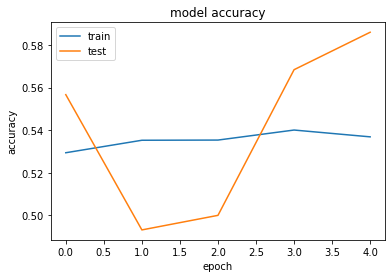

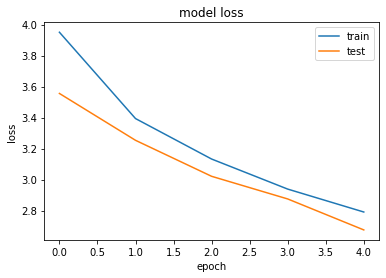

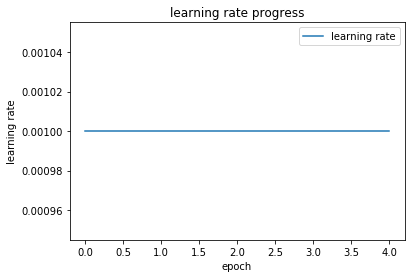

[[ 19 414]
 [ 10 581]]


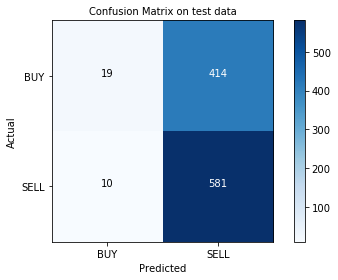

ROC_AUC_SCORE:  0.5134797169239907


Exception in thread Thread-8:
Traceback (most recent call last):
  File "C:\Users\kenneth\Anaconda3\envs\gpu\lib\site-packages\urllib3\connection.py", line 171, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "C:\Users\kenneth\Anaconda3\envs\gpu\lib\site-packages\urllib3\util\connection.py", line 56, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\kenneth\Anaconda3\envs\gpu\lib\socket.py", line 745, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\kenneth\Anaconda3\envs\gpu\lib\site-packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\kenneth\Anaconda3\envs\gpu\lib\site-packages\urllib3\connectionpool.py", line 343, in _make_request
    se

In [ ]:
if best_model_search:
    if __name__ == '__main__':
       
        best_run, best_model = optim.minimize(model=create_bidirectional_cudnnlstm_model, data=data,functions = [data_split, data_params, feature_selection],algo=tpe.suggest,
                                              max_evals=max_evals,trials=Trials(), notebook_name=model_name,rseed=random_state, eval_space=True, verbose=False)
        
               
        
        print("Evaluation of best performing model:")
        build_path('best_model')
        best_model.save('best_model/'+model_name+'.h5')
        print('\n'+'*'*20+"Best Model Configuration:"+'*'*20)
        print(best_model.get_config())
        f = open('best_model/'+model_name+'_best_run.pickle', 'wb')# save best_run parameters in a pickle file
        pickle.dump(best_run, f)
        f.close()
        
        kfold, train_size, shuffle, split, fold_number,random_state = data_split()
        batch_size, time_steps, rm_window, hyperas_epochs, forecast_period, x_scaler = data_params()           
        x_train, y_train, x_test, y_test, batch_size, time_steps, x_predict, last_date, ticker = data()

        test_score, test_accuracy = best_model.evaluate(x_test, y_test, batch_size=batch_size)
        print('test_score: ', test_score, ' test_accuracy: ', test_accuracy)
        print('\n'+'*'*20+"Best Run hyper-parameters:"+'*'*20)
        print(best_run)
        del best_model, best_run, x_train, x_test, y_train, y_test, x_predict
        gc.collect()
        

if  perform_training:
    kfold, train_size, shuffle, split, fold_number,random_state = data_split()
    batch_size, time_steps, rm_window, hyperas_epochs, forecast_period, x_scaler = data_params()           
    x_train, y_train, x_test, y_test, batch_size, time_steps, x_predict, last_date, ticker = data()
    training()
    del x_train, x_test, y_train, y_test, x_predict
   

In [ ]:
if not os.path.exists('train_model/'+model_name+'.h5'):
    print('Trained model doesnt exist, changing evaluate_all_folds to False')
    evaluate_all_folds = False
if evaluate_all_folds:
    batch_size, time_steps, rm_window, hyperas_epochs, forecast_period, x_scaler = data_params()
    df, y, ticker = feature_selection()
    kfold, train_size, shuffle, split, fold_number,random_state = data_split()
    model = load_model('train_model/'+model_name+'.h5')
    print('loaded trained model')

    # add percent change
    df=df.pct_change()
    df=df.replace([np.inf, -np.inf],np.nan) 
    df.fillna(0, inplace=True)
    df.isnull().any().mean()

    # apply preprocessing 
    x = x_scaler.fit_transform(df)
    del df
    gc.collect()
    y=y.values

    # apply time steps
    def create_dataset(X, y, time_steps=1):
        Xs, ys = [], []
        for i in range(len(X) - time_steps):
            v = X[i:(i + time_steps)]
            Xs.append(v)
            ys.append(y[i + time_steps])
        return np.array(Xs), np.array(ys)
    x, y = create_dataset(x, y, time_steps)
    # forecast periods and removing last7 rows (for the target being NaN for 7 day model)
    x_predict = x[-batch_size:]
    x = x[:-forecast_period]
    y =  y[:-forecast_period]

    #implementation of fold
    print('started Kfold')

    count = 0
    fd = KFold(n_splits=split, random_state=random_state, shuffle=shuffle)

    for train_index, test_index in fd.split(x):
        count +=1
        print('processing fold number ', count)

        _, x_test,_, y_test  = x[train_index], x[test_index], y[train_index], y[test_index]
        x_test = x_test.astype('float32')
        y_test = np_utils.to_categorical(y_test, 2, dtype='float32')

        # adjustment for batch_size
        test_start = x_test.shape[0]%batch_size
        x_test = x_test[test_start:]
        y_test = y_test[test_start:]
        test_score, test_accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
        del x_test, y_test
        print('Fold Number ', count, ' test_score: ', test_score, ' test_accuracy: ', test_accuracy)